#Preprocessing and EDA#


In [ ]:
import os
import librosa
import numpy as np
import pandas as pd
import requests
from google.colab import drive

drive.mount('/content/gdrive')  # Connect to your Google Drive account

data_dir = '/content/gdrive/MyDrive/audio_data'  # Update with your data directory in Google Drive

file_path="/content/gdrive/MyDrive/birds_india.csv"
data = pd.read_csv(file_path)

data

Mounted at /content/gdrive


id          gen        sp  ssp                      en  \
0      429767  Dendrocygna   bicolor  NaN  Fulvous Whistling Duck   
1      369151  Dendrocygna  javanica  NaN   Lesser Whistling Duck   
2      369150  Dendrocygna  javanica  NaN   Lesser Whistling Duck   
3      178554  Dendrocygna  javanica  NaN   Lesser Whistling Duck   
4      472687  Dendrocygna  javanica  NaN   Lesser Whistling Duck   
...       ...          ...       ...  ...                     ...   
13649  548597      Mystery   mystery  NaN        Identity unknown   
13650  461580      Mystery   mystery  NaN        Identity unknown   
13651  358434      Mystery   mystery  NaN        Identity unknown   
13652  347185      Mystery   mystery  NaN        Identity unknown   
13653  128359      Mystery   mystery  NaN        Identity unknown   

                          rec    cnt  \
0      Sreekumar Chirukandoth  India   
1               Peter Boesman  India   
2               Peter Boesman  India   
3                  Eveny Luis  India   
4               Peter Boesman  India   
...                       ...    ...   
13649     Niranjan Murthy K R  India   
13650   Dr. Ravikumar Dumpala  India   
13651                BIndyamc  India   
13652      Aravind Amirtharaj  India   
13653            Nikunj Jambu  India   

                                                     loc      lat      lng  \
0      OMR - Medavakkam Toll Gate (near  Chennai), Ka...  12.9011  80.2199   
1      Near Chouldari, South Andaman County, Andaman ...  11.6300  92.6700   
2      Near Chouldari, South Andaman County, Andaman ...  11.6300  92.6700   
3                             Goncoi, Aldona,Bardez, Goa  15.5966  73.8729   
4           Keoladeo National Park, Bharatpur, Rajasthan  27.1593  77.5232   
...                                                  ...      ...      ...   
13649                          Mysuru, Mysuru, Karnataka  12.2908  76.5990   
13650                        Nagpur, Nagpur, Maharashtra  21.1279  79.0499   
13651                         B Jalukie, Peren, Nagaland  25.6321  93.6768   
13652                      Coonoor, Nilgiris, Tamil Nadu  11.3628  76.7979   
13653                                      Dang, Gujarat  20.9467  73.6513   

       ...                                           lic  q length   time  \
0      ...  //creativecommons.org/licenses/by-nc-sa/4.0/  A   0:08  07:00   
1      ...  //creativecommons.org/licenses/by-nc-nd/4.0/  A   0:18  15:00   
2      ...  //creativecommons.org/licenses/by-nc-nd/4.0/  A   0:30  15:00   
3      ...  //creativecommons.org/licenses/by-nc-nd/4.0/  A   0:06  19:17   
4      ...  //creativecommons.org/licenses/by-nc-nd/4.0/  B   0:27  10:30   
...    ...                                           ... ..    ...    ...   
13649  ...  //creativecommons.org/licenses/by-nc-nd/4.0/  E   1:01  05:30   
13650  ...  //creativecommons.org/licenses/by-nc-sa/4.0/  E   0:30  17:00   
13651  ...  //creativecommons.org/licenses/by-nc-sa/4.0/  E   0:16  03:30   
13652  ...  //creativecommons.org/licenses/by-nc-sa/4.0/  E   0:27  11:00   
13653  ...  //creativecommons.org/licenses/by-nc-sa/3.0/  E   1:00  18:00   

             date    uploaded                                            also  \
0      2017-08-27  2018-08-08  ['Corvus splendens', 'Tachybaptus ruficollis']   
1      2017-04-23  2017-05-12                                            ['']   
2      2017-04-23  2017-05-12                                            ['']   
3      2014-05-18  2014-05-18                                            ['']   
4      2019-04-06  2019-05-10                       ['Mycteria leucocephala']   
...           ...         ...                                             ...   
13649  2020-04-21  2020-04-21                                            ['']   
13650  2019-03-12  2019-03-13                                            ['']   
13651  2017-03-10  2017-03-10                                            ['']   
13652  2016-12-19  2016-12-19

In [ ]:
data.columns


Index(['id', 'gen', 'sp', 'ssp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lng',
       'alt', 'type', 'url', 'file', 'file-name', 'sono', 'lic', 'q', 'length',
       'time', 'date', 'uploaded', 'also', 'rmk', 'bird-seen',
       'playback-used'],
      dtype='object')

In [ ]:
df=data.drop(['ssp'], axis=1)


In [ ]:
df2=df.drop(['rmk'],axis=1)
df2.isnull().sum()

id                  0
gen                 0
sp                  0
en                  0
rec                 0
cnt                 0
loc               535
lat               824
lng               824
alt              2303
type                0
url                 0
file              534
file-name         534
sono                0
lic                 0
q                   0
length              0
time                1
date                0
uploaded            0
also                0
bird-seen           0
playback-used       0
dtype: int64

In [ ]:
df2=df2.dropna()

In [ ]:
df2

id          gen        sp                      en  \
0      429767  Dendrocygna   bicolor  Fulvous Whistling Duck   
3      178554  Dendrocygna  javanica   Lesser Whistling Duck   
6      425093  Dendrocygna  javanica   Lesser Whistling Duck   
7      351852  Dendrocygna  javanica   Lesser Whistling Duck   
8      276848  Dendrocygna  javanica   Lesser Whistling Duck   
...       ...          ...       ...                     ...   
13649  548597      Mystery   mystery        Identity unknown   
13650  461580      Mystery   mystery        Identity unknown   
13651  358434      Mystery   mystery        Identity unknown   
13652  347185      Mystery   mystery        Identity unknown   
13653  128359      Mystery   mystery        Identity unknown   

                          rec    cnt  \
0      Sreekumar Chirukandoth  India   
3                  Eveny Luis  India   
6      Sreekumar Chirukandoth  India   
7              Oscar Campbell  India   
8                    Dilip KG  India   
...                       ...    ...   
13649     Niranjan Murthy K R  India   
13650   Dr. Ravikumar Dumpala  India   
13651                BIndyamc  India   
13652      Aravind Amirtharaj  India   
13653            Nikunj Jambu  India   

                                                     loc      lat      lng  \
0      OMR - Medavakkam Toll Gate (near  Chennai), Ka...  12.9011  80.2199   
3                             Goncoi, Aldona,Bardez, Goa  15.5966  73.8729   
6                Mallapuzhassery, Pathanamthitta, Kerala   9.3223  76.7047   
7                 Shreenagar Rural, Bharatpur, Rajasthan  27.1660  77.5245   
8                              Kalady, Ernakulam, Kerala  10.1691  76.4396   
...                                                  ...      ...      ...   
13649                          Mysuru, Mysuru, Karnataka  12.2908  76.5990   
13650                        Nagpur, Nagpur, Maharashtra  21.1279  79.0499   
13651                         B Jalukie, Peren, Nagaland  25.6321  93.6768   
13652                      Coonoor, Nilgiris, Tamil Nadu  11.3628  76.7979   
13653                                      Dang, Gujarat  20.9467  73.6513   

        alt  ...                                               sono  \
0         0  ...  {'small': '//www.xeno-canto.org/sounds/uploade...   
3        20  ...  {'small': '//www.xeno-canto.org/sounds/uploade...   
6        10  ...  {'small': '//www.xeno-canto.org/sounds/uploade...   
7       180  ...  {'small': '//www.xeno-canto.org/sounds/uploade...   
8        10  ...  {'small': '//www.xeno-canto.org/sounds/uploade...   
...     ...  ...                                                ...   
13649   750  ...  {'small': '//www.xeno-canto.org/sounds/uploade...   
13650   320  ...  {'small': '//www.xeno-canto.org/sounds/uploade...   
13651   360  ...  {'small': '//www.xeno-canto.org/sounds/uploade...   
13652  1800  ...  {'small': '//www.xeno-canto.org/sounds/uploade...   
13653   500  ...  {'small': '//www.xeno-canto.org/sounds/uploade...   

                                                lic  q length   time  \
0      //creativecommons.org/licenses/by-nc-sa/4.0/  A   0:08  07:00   
3      //creativecommons.org/licenses/by-nc-nd/4.0/  A   0:06  19:17   
6      //creativecommons.org/licenses/by-nc-sa/4.0/  B   0:28  17:30   
7      //creativecommons.org/licenses/by-nc-sa/4.0/  B   0:43  17:00   
8      //creativecommons.org/licenses/by-nc-sa/4.0/  B   0:22  18:00   
...                                             ... ..    ...    ...   
13649  //creativecommons.org/licenses/by-nc-nd/4.0/  E   1:01  05:30   
13650  //creativecommons.org/licenses/by-nc-sa/4.0/  E   0:30  17:00   
13651  //creativecommons.org/licenses/by-nc-sa/4.0/  E   0:16  03:30   
13652  //creativecommons.org/licenses/by-nc-sa/4.0/  E   0:27  11:00   
13653  //creativecommons.org/licenses/by-nc-sa/3.0/  E   1:00  18:00   

             date    uploaded  \
0      2017-08-27  2018-08-08   
3      2014-05-18  2014-05-18   
6      

In [ ]:
df3= df2[df2['type'] == 'call']

In [ ]:
df3

id          gen        sp                     en  \
7      351852  Dendrocygna  javanica  Lesser Whistling Duck   
10      95805  Dendrocygna  javanica  Lesser Whistling Duck   
11      44829  Dendrocygna  javanica  Lesser Whistling Duck   
13     234153  Dendrocygna  javanica  Lesser Whistling Duck   
14     212199  Dendrocygna  javanica  Lesser Whistling Duck   
...       ...          ...       ...                    ...   
13643  402458      Mystery   mystery       Identity unknown   
13648  146586      Mystery   mystery       Identity unknown   
13650  461580      Mystery   mystery       Identity unknown   
13651  358434      Mystery   mystery       Identity unknown   
13652  347185      Mystery   mystery       Identity unknown   

                         rec    cnt                                     loc  \
7             Oscar Campbell  India  Shreenagar Rural, Bharatpur, Rajasthan   
10                 vir joshi  India                              saldi pond   
11                Sander Bot  India                    Carambolim Lake, Goa   
13              Krishna Khan  India     Chhatri Lake, Amravati, Maharashtra   
14             Pronoy Baidya  India                    Carambolim Lake, Goa   
...                      ...    ...                                     ...   
13643          Antonio Xeira  India            Divar Island, North Goa, Goa   
13648            Sharad Apte  India                      Sattal Uttarakhand   
13650  Dr. Ravikumar Dumpala  India             Nagpur, Nagpur, Maharashtra   
13651               BIndyamc  India              B Jalukie, Peren, Nagaland   
13652     Aravind Amirtharaj  India           Coonoor, Nilgiris, Tamil Nadu   

           lat      lng   alt  ...  \
7      27.1660  77.5245   180  ...   
10     21.5760  71.3230    10  ...   
11     15.4890  73.9290     6  ...   
13     20.8935  77.7745   360  ...   
14     15.4890  73.9290     0  ...   
...        ...      ...   ...  ...   
13643  15.5161  73.8919     0  ...   
13648  30.0349  80.4089  1434  ...   
13650  21.1279  79.0499   320  ...   
13651  25.6321  93.6768   360  ...   
13652  11.3628  76.7979  1800  ...   

                                                    sono  \
7      {'small': '//www.xeno-canto.org/sounds/uploade...   
10     {'small': '//www.xeno-canto.org/sounds/uploade...   
11     {'small': '//www.xeno-canto.org/sounds/uploade...   
13     {'small': '//www.xeno-canto.org/sounds/uploade...   
14     {'small': '//www.xeno-canto.org/sounds/uploade...   
...                                                  ...   
13643  {'small': '//www.xeno-canto.org/sounds/uploade...   
13648  {'small': '//www.xeno-canto.org/sounds/uploade...   
13650  {'small': '//www.xeno-canto.org/sounds/uploade...   
13651  {'small': '//www.xeno-canto.org/sounds/uploade...   
13652  {'small': '//www.xeno-canto.org/sounds/uploade...   

                                                lic  q length         time  \
7      //creativecommons.org/licenses/by-nc-sa/4.0/  B   0:43        17:00   
10     //creativecommons.org/licenses/by-nc-nd/2.5/  B   0:10   7:57:34 PM   
11     //creativecommons.org/licenses/by-nc-nd/2.5/  B   0:14            ?   
13     //creativecommons.org/licenses/by-nc-sa/4.0/  D   0:10        18:29   
14     //creativecommons.org/licenses/by-nc-nd/4.0/  E   0:40        10:00   
...                                             ... ..    ...          ...   
13643  //creativecommons.org/licenses/by-nc-sa/4.0/  D   0:05        13:00   
13648  //creativecommons.org/licenses/by-nc-sa/3.0/  D   0:17        09:30   
13650  //creativecommons.org/licenses/by-nc-sa/4.0/  E   0:30        17:00   
13651  //creativecommons.org/licenses/by-nc-sa/4.0/  E   0:16        03:30   
13652  //creativecommons.org/licenses/by-nc-sa/4.0/  E   0:27        11:00   

             date    uploaded                       also bird-seen  \
7      2016-12-21  2017-01-22  ['Mycteria leucocephala']       yes   
10     2011-10-04  2012-02-28                     

In [ ]:
df4=df3[["id","en","loc","lat","lng","file","length"]]
df4

id                     en                                     loc  \
7      351852  Lesser Whistling Duck  Shreenagar Rural, Bharatpur, Rajasthan   
10      95805  Lesser Whistling Duck                              saldi pond   
11      44829  Lesser Whistling Duck                    Carambolim Lake, Goa   
13     234153  Lesser Whistling Duck     Chhatri Lake, Amravati, Maharashtra   
14     212199  Lesser Whistling Duck                    Carambolim Lake, Goa   
...       ...                    ...                                     ...   
13643  402458       Identity unknown            Divar Island, North Goa, Goa   
13648  146586       Identity unknown                      Sattal Uttarakhand   
13650  461580       Identity unknown             Nagpur, Nagpur, Maharashtra   
13651  358434       Identity unknown              B Jalukie, Peren, Nagaland   
13652  347185       Identity unknown           Coonoor, Nilgiris, Tamil Nadu   

           lat      lng                                  file length  
7      27.1660  77.5245  //www.xeno-canto.org/351852/download   0:43  
10     21.5760  71.3230   //www.xeno-canto.org/95805/download   0:10  
11     15.4890  73.9290   //www.xeno-canto.org/44829/download   0:14  
13     20.8935  77.7745  //www.xeno-canto.org/234153/download   0:10  
14     15.4890  73.9290  //www.xeno-canto.org/212199/download   0:40  
...        ...      ...                                   ...    ...  
13643  15.5161  73.8919  //www.xeno-canto.org/402458/download   0:05  
13648  30.0349  80.4089  //www.xeno-canto.org/146586/download   0:17  
13650  21.1279  79.0499  //www.xeno-canto.org/461580/download   0:30  
13651  25.6321  93.6768  //www.xeno-canto.org/358434/download   0:16  
13652  11.3628  76.7979  //www.xeno-canto.org/347185/download   0:27  

[4665 rows x 7 columns]

In [ ]:
df4.drop(df4[df4["en"] == "Soundscape"].index, inplace=True)

<ipython-input-10-27bbee3e7de9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(df4[df4["en"] == "Soundscape"].index, inplace=True)


In [ ]:
df4.drop(df4[df4["en"] == "Identity unknown"].index, inplace=True)

<ipython-input-11-5da3c87155a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(df4[df4["en"] == "Identity unknown"].index, inplace=True)


Minimum duration: 0:00
Maximum duration: 6:12


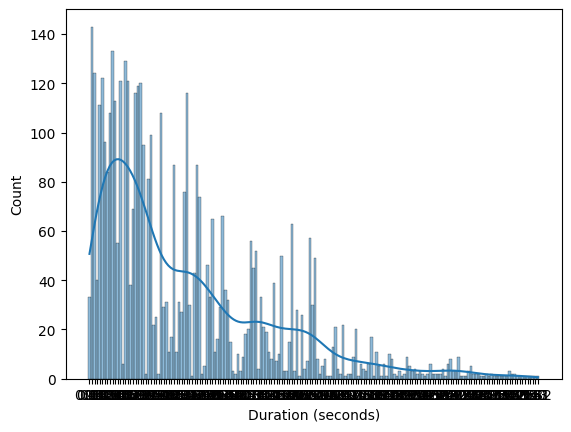

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is called df2 and the duration column is called "duration"
duration_data = df4["length"]

# Print minimum and maximum duration
print("Minimum duration:", duration_data.min())
print("Maximum duration:", duration_data.max())

# Create histogram with KDE plot
sns.histplot(duration_data, bins=50, kde=True)

# Set x and y axis labels
plt.xlabel("Duration (seconds)")
plt.ylabel("Count")

# Show the plot
plt.show()


In [ ]:
def is_desert(latitude, longitude):
    # Check if the latitude and longitude fall within the range of the Thar Desert
    if latitude >= 24.6 and latitude <= 30.5 and longitude >= 68.7 and longitude <= 75.3:
        return 1
    else:
        return 0

# Apply the is_desert function to the latitude and longitude columns
df4['Desert/Non-Desert'] = np.vectorize(is_desert)(df4['lat'], df4['lng'])

df5=df4.drop(['loc','lat','lng'],axis=1)
df5

<ipython-input-13-6c842a43dd23>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Desert/Non-Desert'] = np.vectorize(is_desert)(df4['lat'], df4['lng'])


id                     en                                  file  \
7      351852  Lesser Whistling Duck  //www.xeno-canto.org/351852/download   
10      95805  Lesser Whistling Duck   //www.xeno-canto.org/95805/download   
11      44829  Lesser Whistling Duck   //www.xeno-canto.org/44829/download   
13     234153  Lesser Whistling Duck  //www.xeno-canto.org/234153/download   
14     212199  Lesser Whistling Duck  //www.xeno-canto.org/212199/download   
...       ...                    ...                                   ...   
13269  403275         Little Bunting  //www.xeno-canto.org/403275/download   
13270  403273         Little Bunting  //www.xeno-canto.org/403273/download   
13271  403271         Little Bunting  //www.xeno-canto.org/403271/download   
13273   95783     Red-headed Bunting   //www.xeno-canto.org/95783/download   
13274  157720    Black-faced Bunting  //www.xeno-canto.org/157720/download   

      length  Desert/Non-Desert  
7       0:43                  0  
10      0:10                  0  
11      0:14                  0  
13      0:10                  0  
14      0:40                  0  
...      ...                ...  
13269   1:02                  0  
13270   0:08                  0  
13271   0:24                  0  
13273   0:17                  0  
13274   1:11                  0  

[4506 rows x 5 columns]

In [ ]:
df5.isnull().sum()

id                   0
en                   0
file                 0
length               0
Desert/Non-Desert    0
dtype: int64

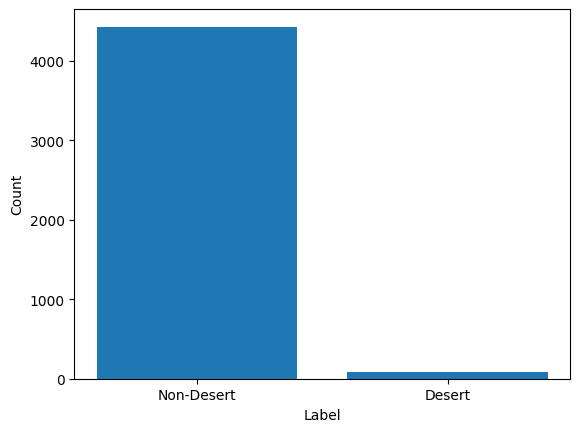

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called df5 and the "desert/non desert" column is called "label"
label_counts = df5["Desert/Non-Desert"].value_counts()

# Create bar graph
plt.bar(label_counts.index, label_counts.values)

# Set x and y axis labels
plt.xlabel("Label")
plt.ylabel("Count")

# Set x axis tick labels
plt.xticks([0, 1], ["Non-Desert", "Desert"])

# Show the plot
plt.show()


In [ ]:
desert_rows = df5[df5["Desert/Non-Desert"] == 1]
print("Rows with Desert label:\n", desert_rows)

Rows with Desert label:
            id                       en                                  file  \
161    351857           Grey Francolin  //www.xeno-canto.org/351857/download   
178    308183           Grey Francolin  //www.xeno-canto.org/308183/download   
335    104135             Red Spurfowl  //www.xeno-canto.org/104135/download   
533    165857           Indian Peafowl  //www.xeno-canto.org/165857/download   
551    104137           Indian Peafowl  //www.xeno-canto.org/104137/download   
...       ...                      ...                                   ...   
12793  149556  Yellow-throated Sparrow  //www.xeno-canto.org/149556/download   
12867  454322        Indian Silverbill  //www.xeno-canto.org/454322/download   
12868  165245        Indian Silverbill  //www.xeno-canto.org/165245/download   
13261  454321      Grey-necked Bunting  //www.xeno-canto.org/454321/download   
13264  454319       Striolated Bunting  //www.xeno-canto.org/454319/download   

      length  

In [ ]:
bird_names = desert_rows["en"].unique()


bird_counts = {}


for bird in bird_names:
    count = desert_rows[desert_rows["en"] == bird].shape[0]
    bird_counts[bird] = count

for bird, count in bird_counts.items():
    print(f"{bird}: {count}")

Grey Francolin: 2
Red Spurfowl: 1
Indian Peafowl: 2
Steppe Eagle: 1
Shikra: 1
Black Kite: 1
Demoiselle Crane: 8
Black-winged Stilt: 1
Red-wattled Lapwing: 1
Little Stint: 1
Painted Sandgrouse: 2
Rock Dove: 1
Asian Koel: 1
Indian Scops Owl: 1
Savanna Nightjar: 1
Laggar Falcon: 1
White-bellied Minivet: 5
Small Minivet: 1
Great Grey Shrike: 2
White-spotted Fantail: 1
Rufous Treepie: 1
House Crow: 3
Indian Jungle Crow: 2
Northern Raven: 4
Indian Black-lored Tit: 1
Black-crowned Sparrow-Lark: 2
Greater Short-toed Lark: 1
Bimaculated Lark: 1
Red-vented Bulbul: 1
Wire-tailed Swallow: 2
Hume's Leaf Warbler: 3
Sulphur-bellied Warbler: 1
Blyth's Reed Warbler: 1
Graceful Prinia: 1
Common Tailorbird: 1
Large Grey Babbler: 1
Lesser Whitethroat: 3
Eastern Orphean Warbler: 2
Indian Spotted Creeper: 1
Indian Robin: 1
White-browed Bush Chat: 1
Isabelline Wheatear: 1
Brown Rock Chat: 3
Purple Sunbird: 1
Yellow-throated Sparrow: 2
Indian Silverbill: 2
Grey-necked Bunting: 1
Striolated Bunting: 1


#Analysing for Gray Francolin#

In [ ]:
df_gf=df5[df5['en'] == 'Grey Francolin']

In [ ]:
df_gf

id              en                                  file length  \
159  459199  Grey Francolin  //www.xeno-canto.org/459199/download   0:12   
160  441379  Grey Francolin  //www.xeno-canto.org/441379/download   0:07   
161  351857  Grey Francolin  //www.xeno-canto.org/351857/download   0:21   
162  337047  Grey Francolin  //www.xeno-canto.org/337047/download   0:51   
169  469359  Grey Francolin  //www.xeno-canto.org/469359/download   0:12   
170  459288  Grey Francolin  //www.xeno-canto.org/459288/download   0:10   
171  459287  Grey Francolin  //www.xeno-canto.org/459287/download   0:12   
172  451799  Grey Francolin  //www.xeno-canto.org/451799/download   0:03   
173  406118  Grey Francolin  //www.xeno-canto.org/406118/download   0:05   
176  332453  Grey Francolin  //www.xeno-canto.org/332453/download   0:10   
178  308183  Grey Francolin  //www.xeno-canto.org/308183/download   0:25   
179  199108  Grey Francolin  //www.xeno-canto.org/199108/download   0:12   
180  194204  Grey Francolin  //www.xeno-canto.org/194204/download   0:12   
191  442342  Grey Francolin  //www.xeno-canto.org/442342/download   0:02   
196   21668  Grey Francolin   //www.xeno-canto.org/21668/download   0:17   

     Desert/Non-Desert  
159                  0  
160                  0  
161                  1  
162                  0  
169                  0  
170                  0  
171                  0  
172                  0  
173                  0  
176                  0  
178                  1  
179                  0  
180                  0  
191                  0  
196                  0

In [ ]:
len(df_gf)

15

#Signal Processing Approach #

##Ploting Spectrograms##

In [ ]:
def extract_max_energy(S, sr):
    # Remove noise
    S = librosa.decompose.nn_filter(S, aggregate=np.median, metric='cosine')

    # Find the 5-second window with the maximum energy
    window_size_frames =5* sr  // 512  # 512 is the default hop length used by librosa
    num_windows = S.shape[1] // window_size_frames
    #print(window_size_frames, num_windows)

    max_energy = 0
    max_start = 0
    for i in range(num_windows):
        start = i * window_size_frames
        end = start + window_size_frames
        energy = np.sum(S[:, start:end])
        if energy > max_energy:
            max_energy = energy
            max_start = start
    max_end = max_start + window_size_frames
   # print(max_start, max_end)
    # Extract the 5 seconds of spectrogram with maximum energy
    S_max_energy = S[:, max_start:max_end]

    return S_max_energy


In [ ]:
index=159

/content/gdrive/MyDrive/audio_data/159.mp3


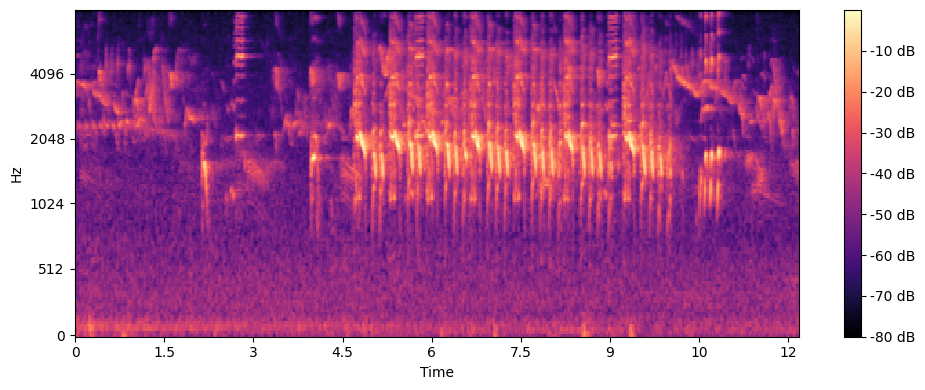

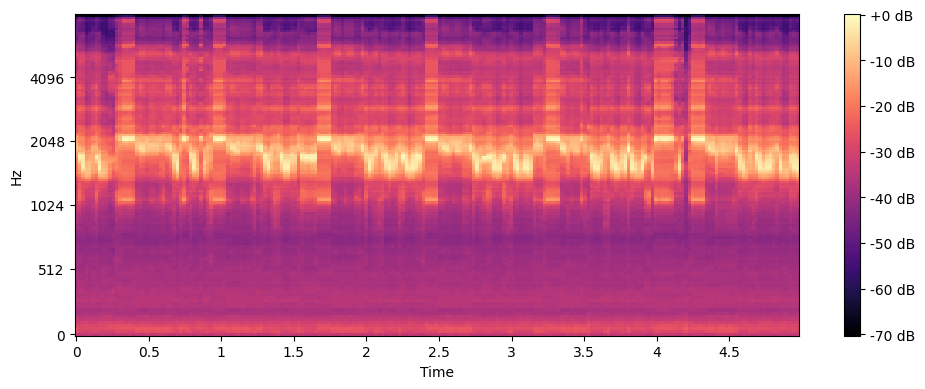

In [ ]:
import librosa.display as ld
file_name = f"{index}.mp3"
file_path = os.path.join(data_dir, file_name)
print(file_path)
# Compute the spectrogram
y, sr = librosa.load(file_path)
S = librosa.feature.melspectrogram(y=y, sr=sr)
S2=extract_max_energy(S,sr)
# Plot the spectrogram
plt.figure(figsize=(10, 4))
ld.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')

plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 4))
ld.specshow(librosa.power_to_db(S2, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')

plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

In [ ]:
index=161

/content/gdrive/MyDrive/audio_data/161.mp3


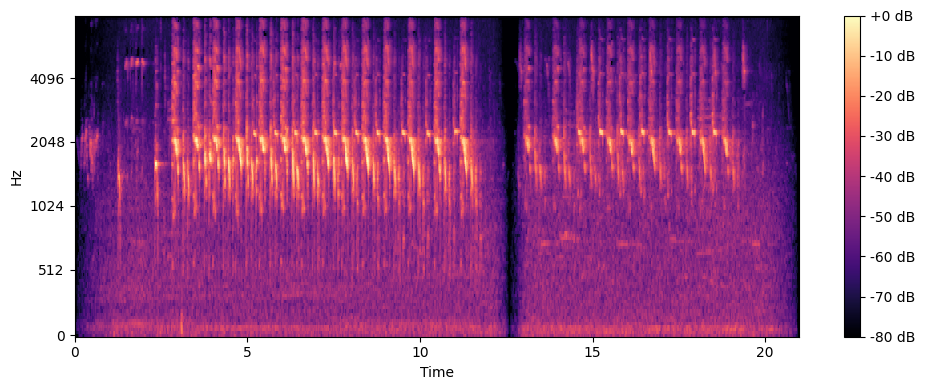

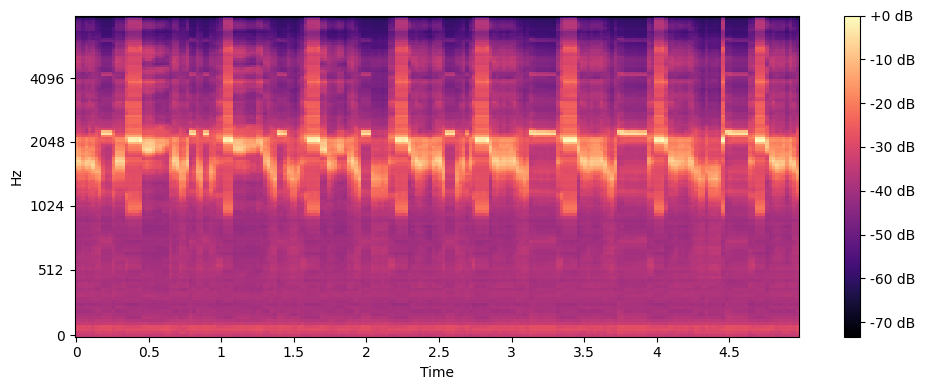

In [ ]:
import librosa.display as ld
file_name = f"{index}.mp3"
file_path = os.path.join(data_dir, file_name)
print(file_path)
# Compute the spectrogram
y, sr = librosa.load(file_path)
S_des = librosa.feature.melspectrogram(y=y, sr=sr)
S2_des=extract_max_energy(S_des,sr)
# Plot the spectrogram
plt.figure(figsize=(10, 4))
ld.specshow(librosa.power_to_db(S_des, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')

plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 4))
ld.specshow(librosa.power_to_db(S2_des, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')

plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

In [ ]:
S2_des

array([[2.7273414e-03, 2.5376135e-03, 2.4076584e-03, ..., 2.3455520e-03,
        2.3590992e-03, 2.7443226e-03],
       [3.2650100e-03, 3.7437337e-03, 4.0450003e-03, ..., 3.9001531e-03,
        3.0044047e-03, 5.2977679e-03],
       [7.6301824e-03, 7.0856689e-03, 6.9082342e-03, ..., 6.1896434e-03,
        5.1024510e-03, 7.8938045e-03],
       ...,
       [3.5954668e-05, 3.5737386e-05, 1.8159224e-05, ..., 3.8596649e-05,
        1.8419483e-05, 1.0764817e-05],
       [1.3602719e-05, 1.2968059e-05, 7.7068944e-06, ..., 1.2099673e-05,
        8.2581209e-06, 4.5823845e-06],
       [7.8338303e-07, 7.8338303e-07, 5.6705903e-07, ..., 8.1189910e-07,
        7.2741375e-07, 4.8937943e-07]], dtype=float32)

In [ ]:
S2

array([[1.9673500e-02, 1.1847297e-02, 1.2750082e-02, ..., 1.2050254e-02,
        1.2865648e-02, 1.4909808e-02],
       [6.1135180e-02, 3.4795951e-02, 2.5897928e-02, ..., 3.1521607e-02,
        3.4282789e-02, 2.5897928e-02],
       [6.8340234e-02, 3.9719529e-02, 3.6307234e-02, ..., 4.2650804e-02,
        4.2810872e-02, 3.6307234e-02],
       ...,
       [5.4744777e-04, 1.8698436e-03, 7.8303053e-04, ..., 5.7999900e-04,
        3.3850159e-04, 3.8743674e-04],
       [1.1697505e-04, 4.4633710e-04, 2.1477917e-04, ..., 1.3175397e-04,
        1.1773602e-04, 1.2869069e-04],
       [2.9325165e-06, 7.0889446e-06, 5.3441349e-06, ..., 3.8919734e-06,
        4.0338264e-06, 3.9777779e-06]], dtype=float32)

In [ ]:
df_gf['Spectrogram'] = None

<ipython-input-28-597f8aafd05d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gf['Spectrogram'] = None


Frequency of maximum energy: 2239.003521681573 Hz
Value of maximum energy: -12.700423 dB


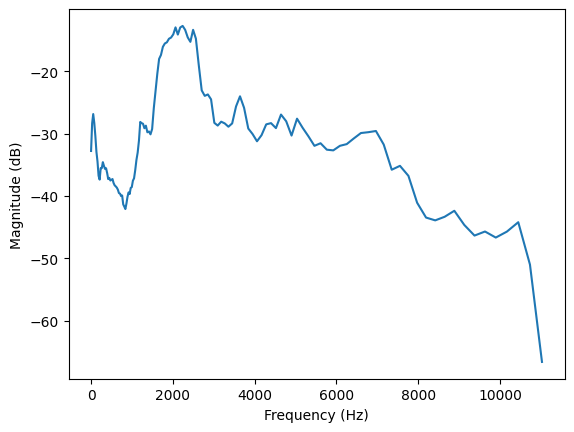

In [ ]:
S_dB = librosa.power_to_db(S2, ref=np.max)

# Extract frequency data
freqs = librosa.mel_frequencies(n_mels=S2.shape[0], fmin=0, fmax=sr/2)

# Find the index of the maximum energy
max_idx = np.argmax(np.mean(S_dB, axis=1))

# Print the frequency and value of the maximum energy
print('Frequency of maximum energy:', freqs[max_idx], 'Hz')
print('Value of maximum energy:', np.mean(S_dB, axis=1)[max_idx], 'dB')

# Plot frequency data
plt.plot(freqs, np.mean(S_dB, axis=1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()


127


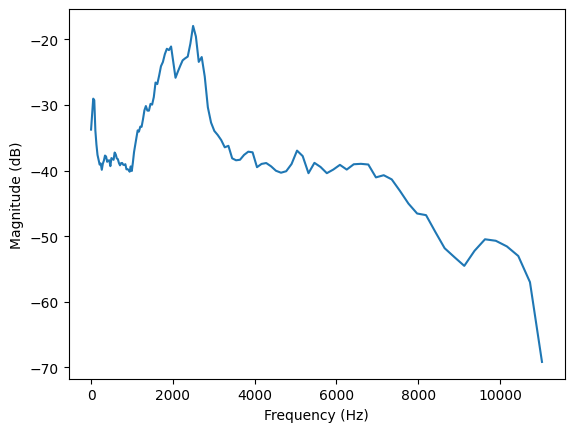

In [ ]:
S_dB2 = librosa.power_to_db(S2_des, ref=np.max)

# Extract frequency data
freqs = librosa.mel_frequencies(n_mels=S2_des.shape[0], fmin=0, fmax=sr/2)
print(np.argmax(freqs))
# Plot frequency data
plt.plot(freqs, np.mean(S_dB2, axis=1))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(S2.reshape(1, -1), S2_des.reshape(1, -1))[0][0]

0.23905356

/content/gdrive/MyDrive/audio_data/159.mp3


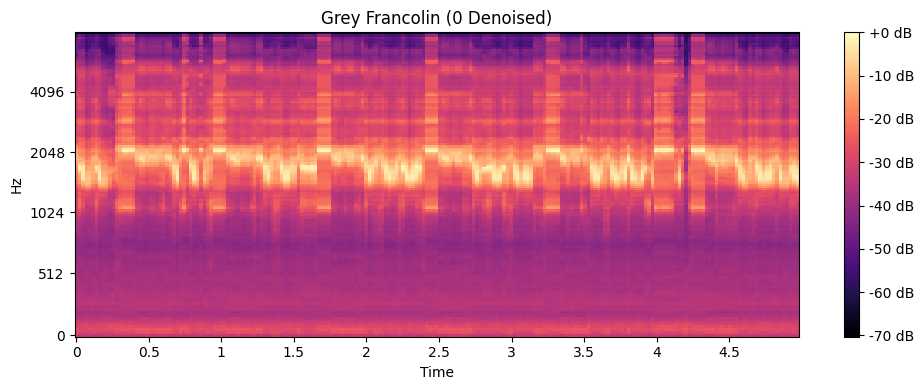

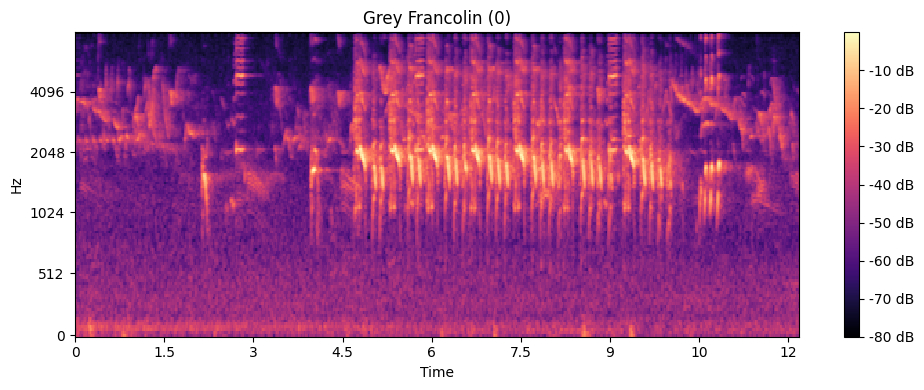

/content/gdrive/MyDrive/audio_data/160.mp3


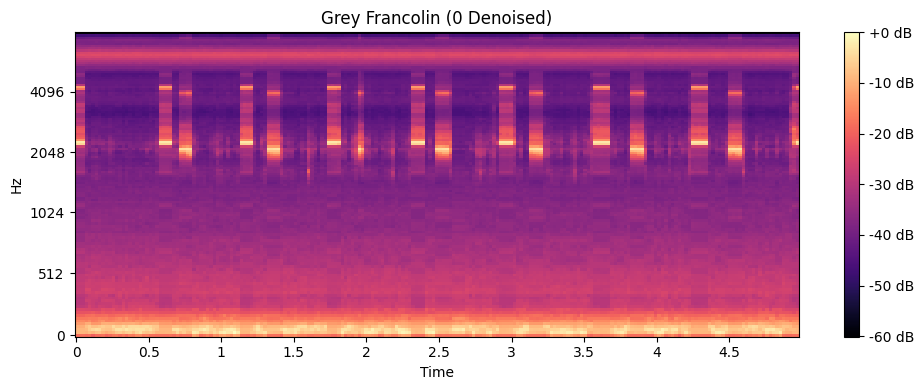

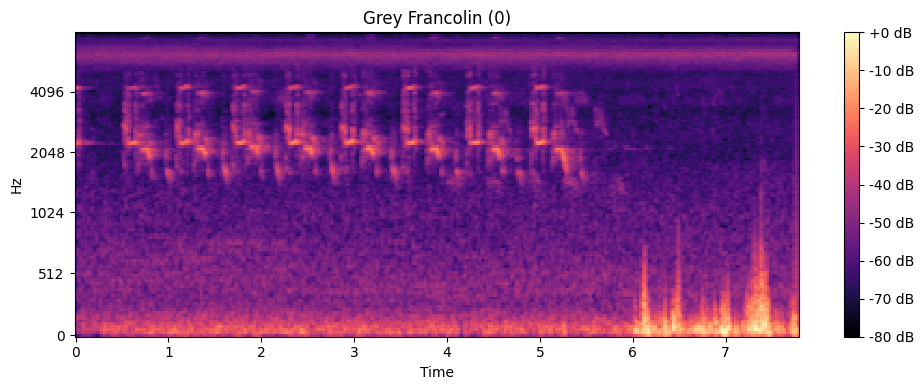

/content/gdrive/MyDrive/audio_data/161.mp3


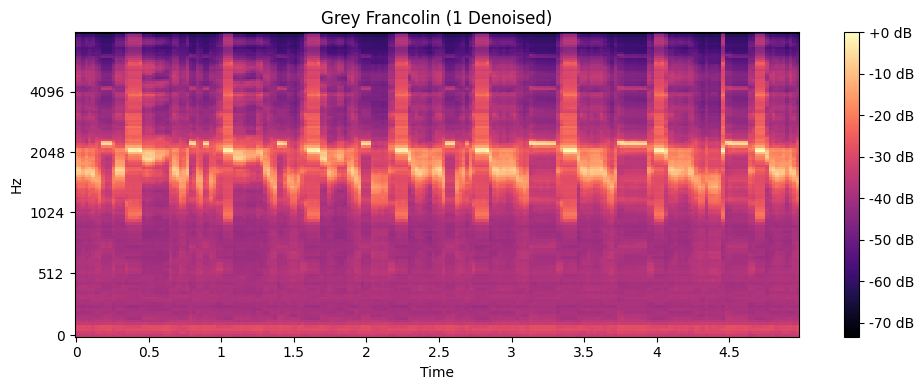

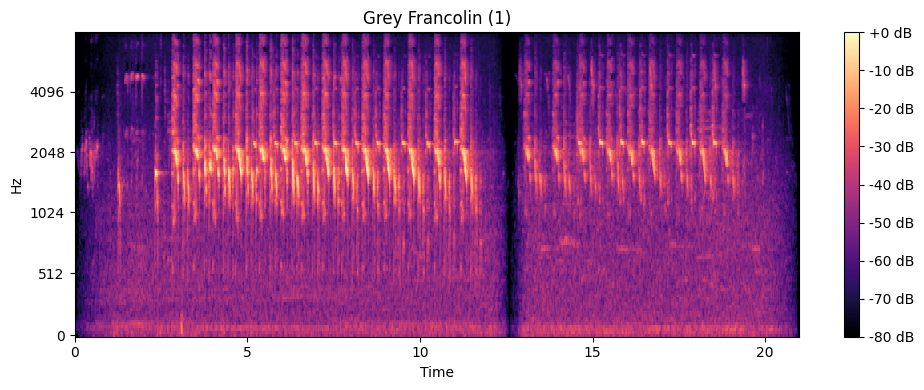

/content/gdrive/MyDrive/audio_data/162.mp3


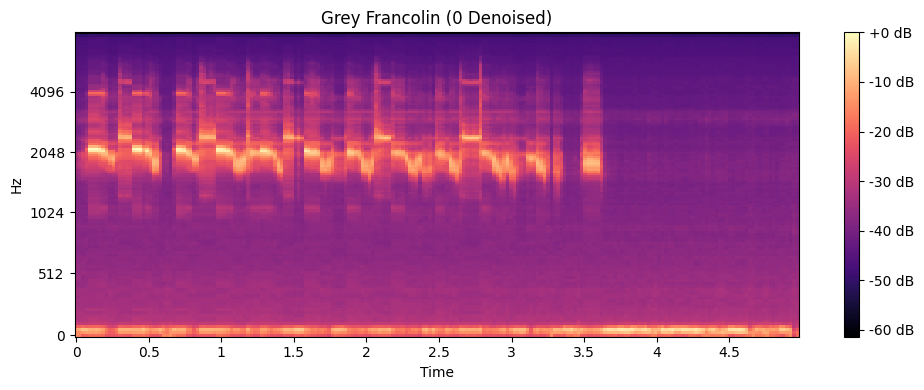

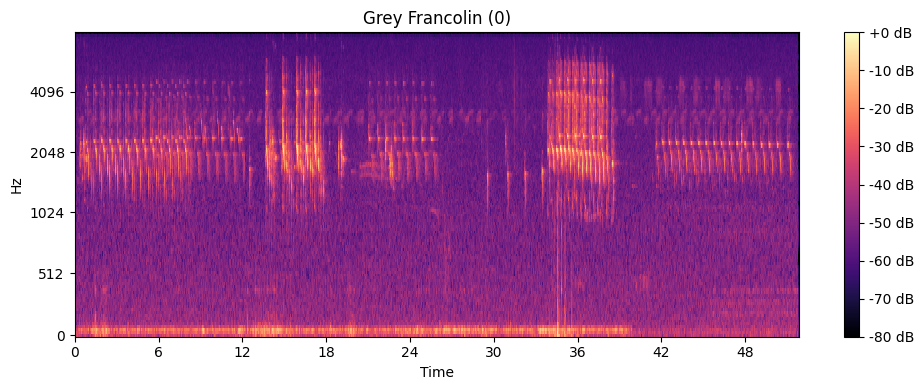

/content/gdrive/MyDrive/audio_data/169.mp3


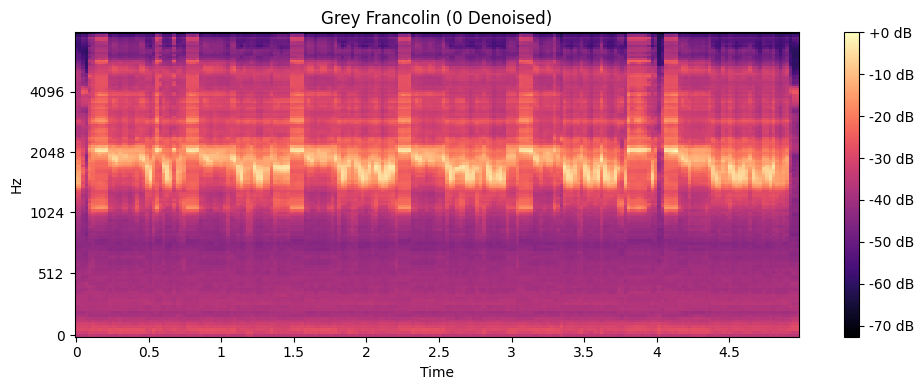

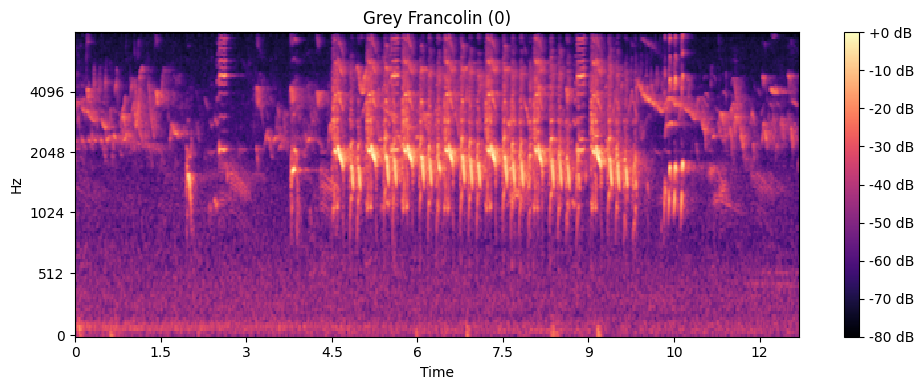

/content/gdrive/MyDrive/audio_data/170.mp3


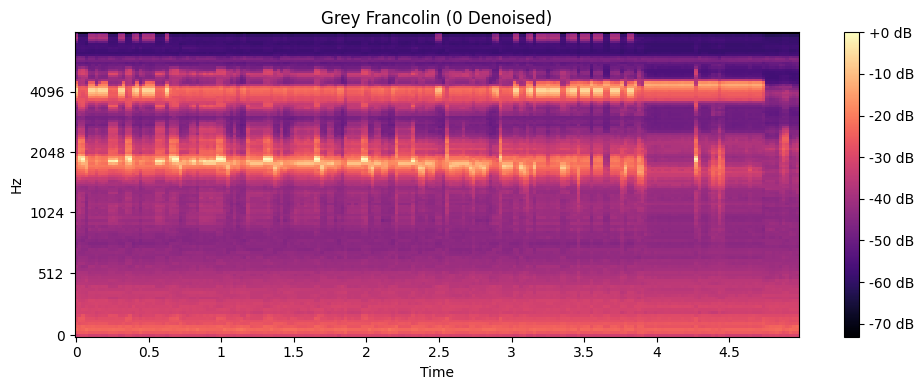

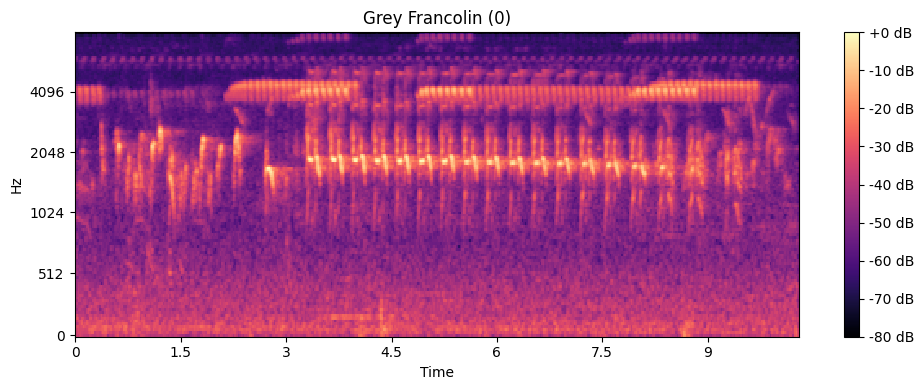

/content/gdrive/MyDrive/audio_data/171.mp3


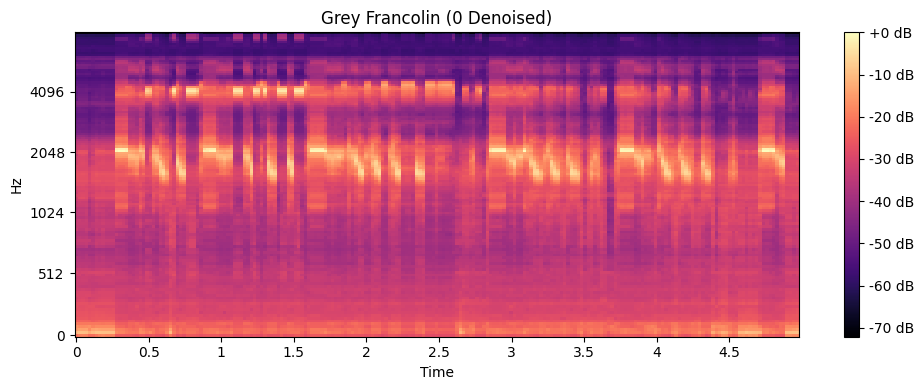

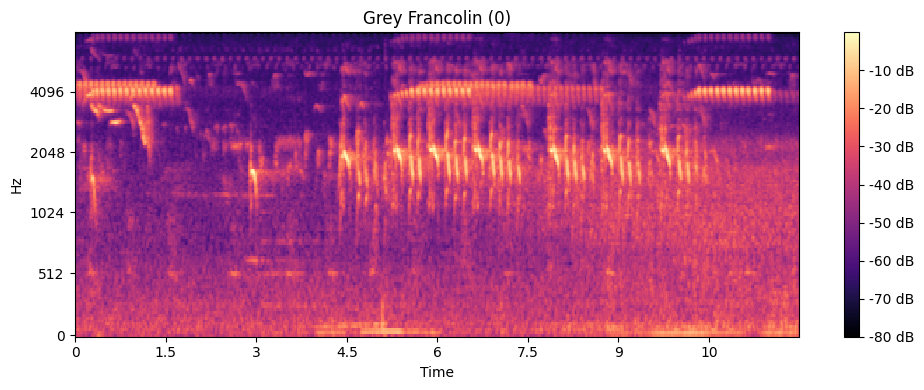

/content/gdrive/MyDrive/audio_data/172.mp3


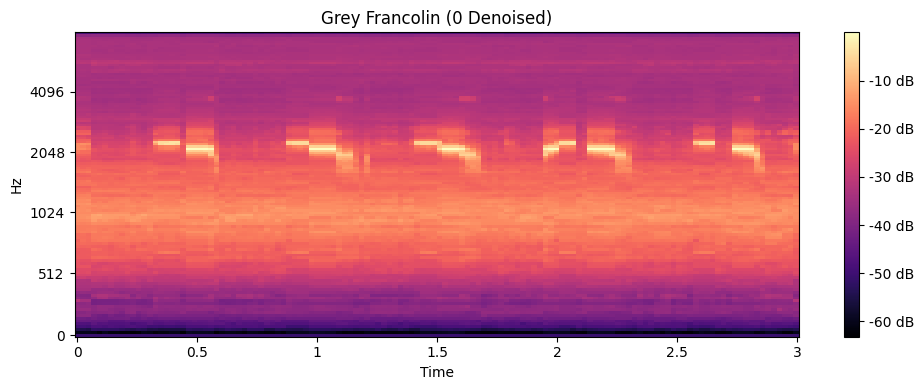

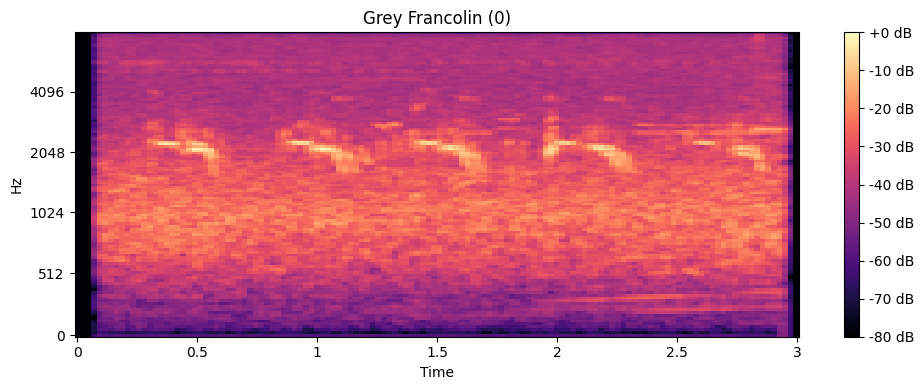

/content/gdrive/MyDrive/audio_data/173.mp3


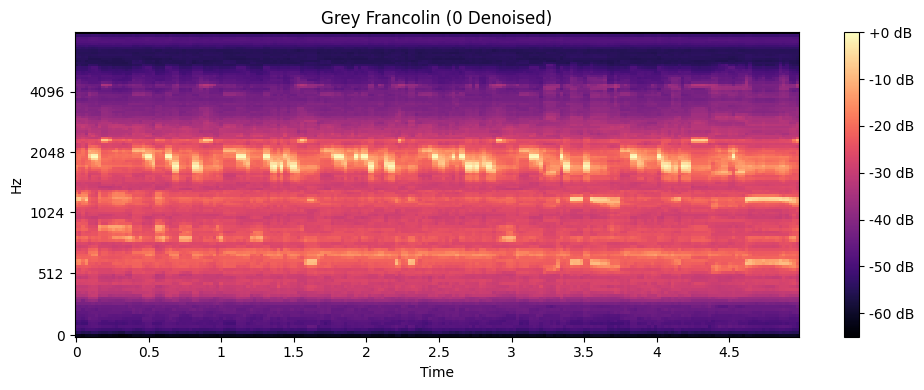

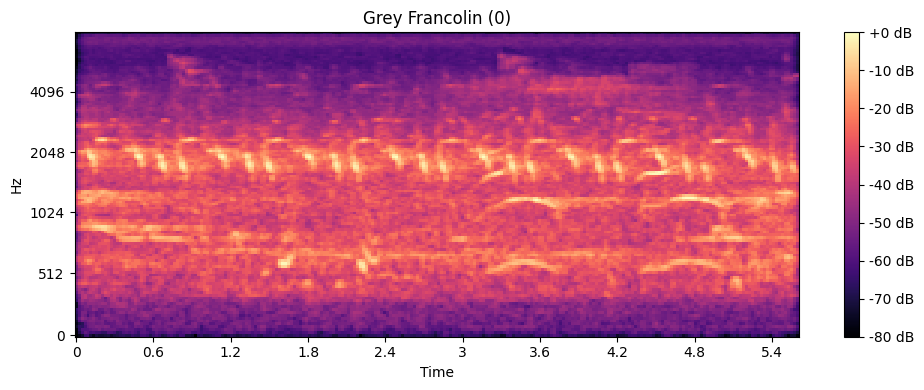

/content/gdrive/MyDrive/audio_data/176.mp3


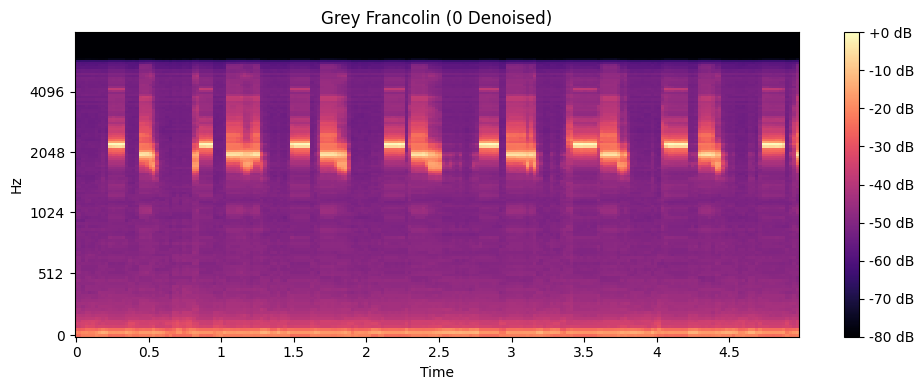

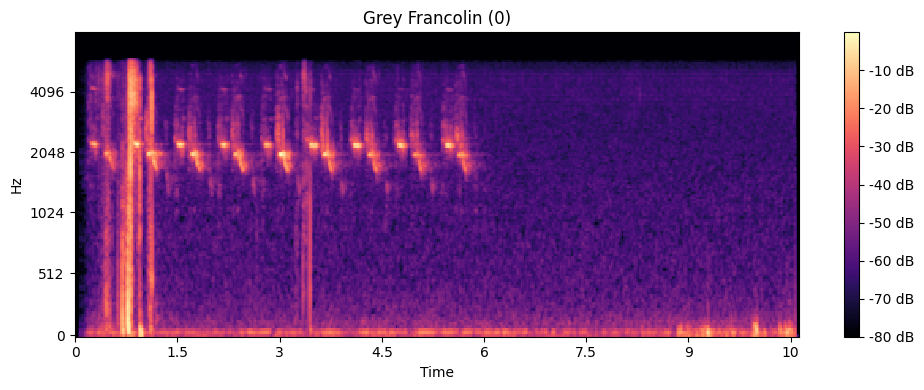

/content/gdrive/MyDrive/audio_data/178.mp3


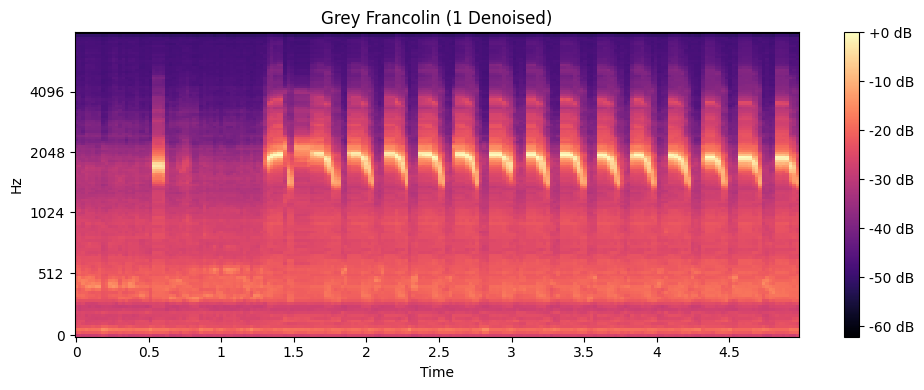

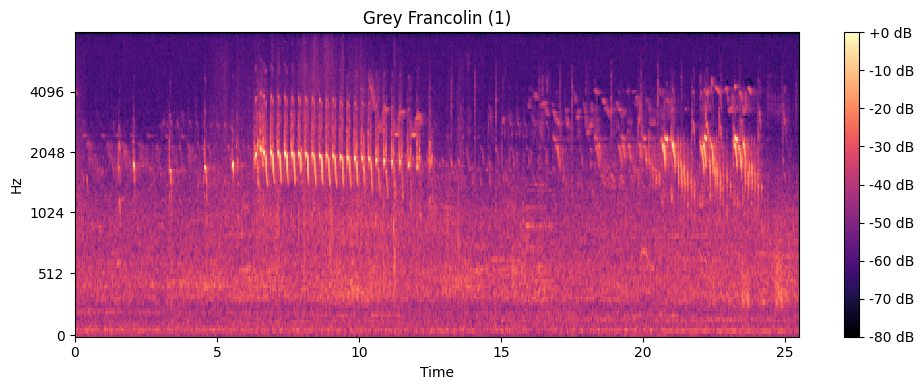

/content/gdrive/MyDrive/audio_data/179.mp3


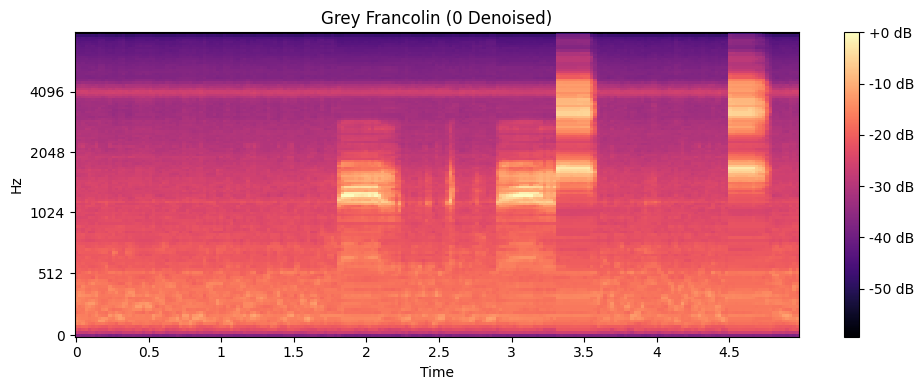

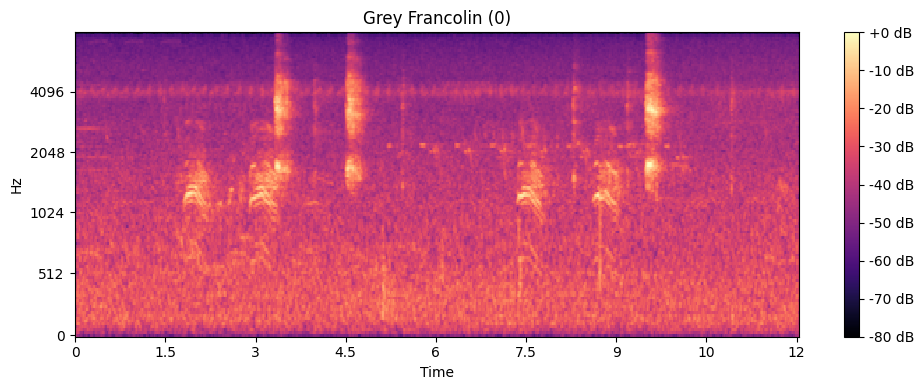

/content/gdrive/MyDrive/audio_data/180.mp3


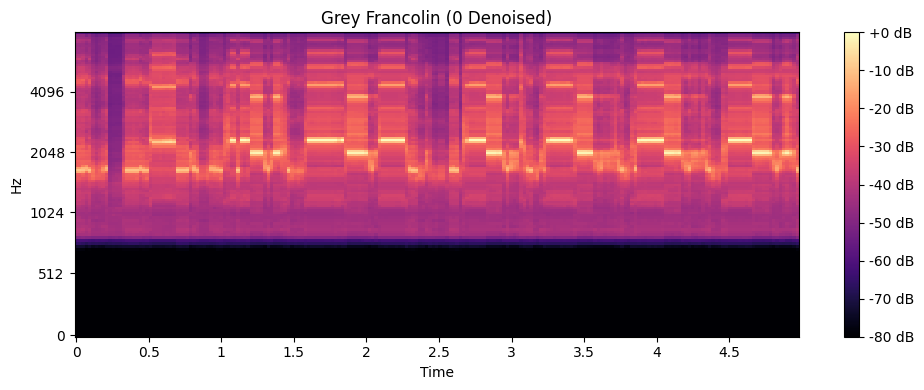

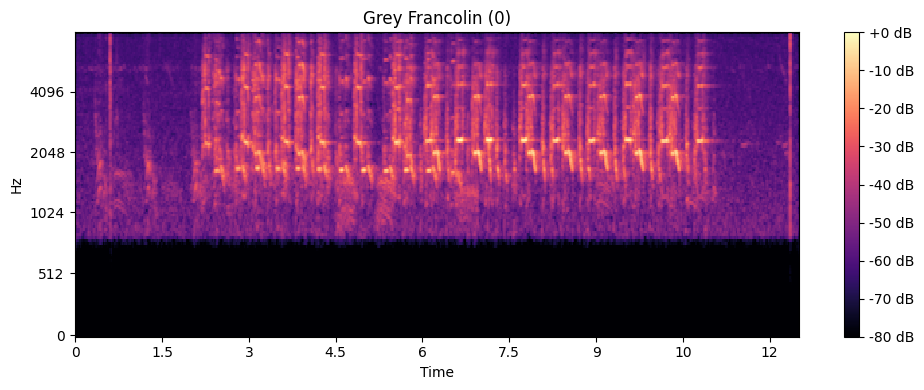

/content/gdrive/MyDrive/audio_data/191.mp3


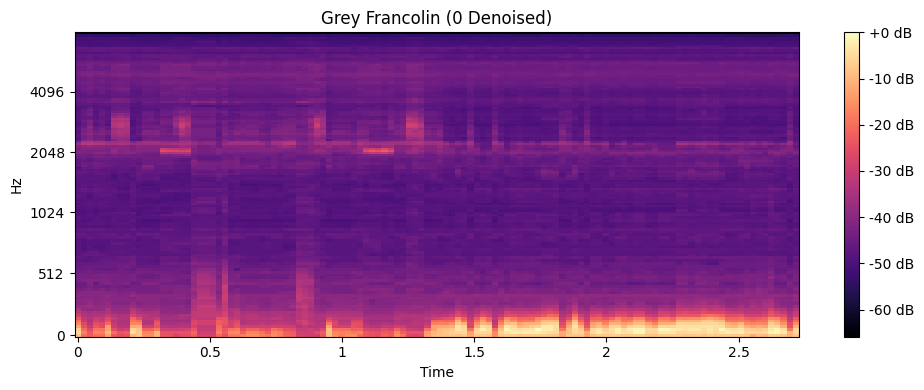

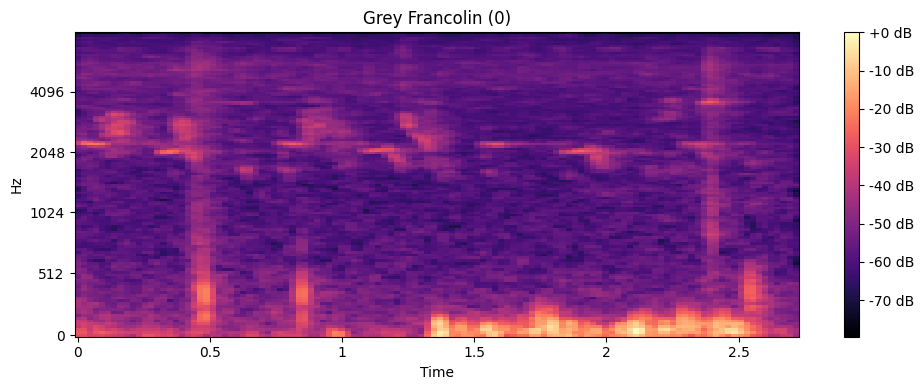

/content/gdrive/MyDrive/audio_data/196.mp3


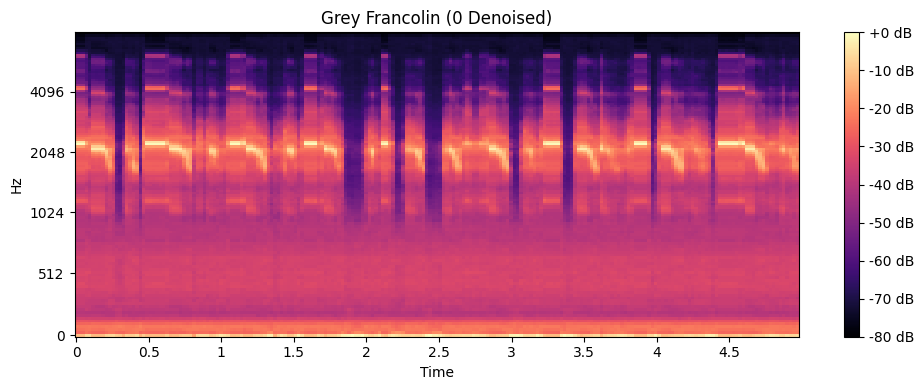

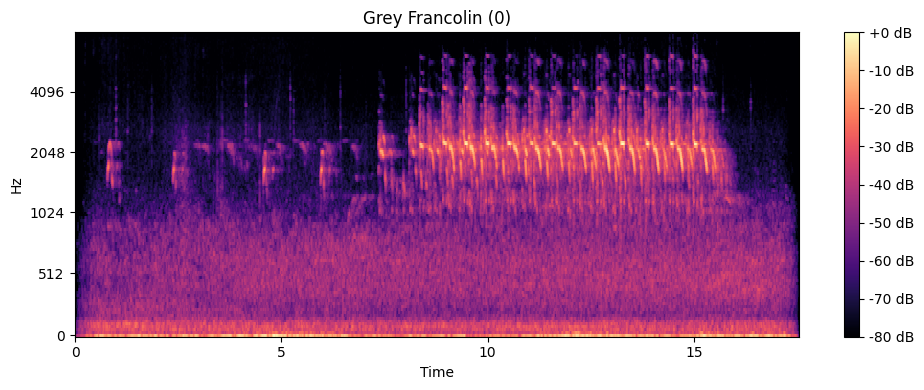

In [ ]:
import librosa.display as ld
for index, row in df_gf.iterrows():
    # Load the audio file
    file_name = f"{index}.mp3"
    file_path = os.path.join(data_dir, file_name)
    print(file_path)
    # Compute the spectrogram
    y, sr = librosa.load(file_path)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S2=extract_max_energy(S,sr)
    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    ld.specshow(librosa.power_to_db(S2, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{row['en']} ({row['Desert/Non-Desert']} Denoised)")
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(10, 4))
    ld.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"{row['en']} ({row['Desert/Non-Desert']})")
    plt.tight_layout()
    plt.show()
    df_gf.at[index, 'Spectrogram'] = S2

In [ ]:
df_gf

id              en                                  file length  \
159  459199  Grey Francolin  //www.xeno-canto.org/459199/download   0:12   
160  441379  Grey Francolin  //www.xeno-canto.org/441379/download   0:07   
161  351857  Grey Francolin  //www.xeno-canto.org/351857/download   0:21   
162  337047  Grey Francolin  //www.xeno-canto.org/337047/download   0:51   
169  469359  Grey Francolin  //www.xeno-canto.org/469359/download   0:12   
170  459288  Grey Francolin  //www.xeno-canto.org/459288/download   0:10   
171  459287  Grey Francolin  //www.xeno-canto.org/459287/download   0:12   
172  451799  Grey Francolin  //www.xeno-canto.org/451799/download   0:03   
173  406118  Grey Francolin  //www.xeno-canto.org/406118/download   0:05   
176  332453  Grey Francolin  //www.xeno-canto.org/332453/download   0:10   
178  308183  Grey Francolin  //www.xeno-canto.org/308183/download   0:25   
179  199108  Grey Francolin  //www.xeno-canto.org/199108/download   0:12   
180  194204  Grey Francolin  //www.xeno-canto.org/194204/download   0:12   
191  442342  Grey Francolin  //www.xeno-canto.org/442342/download   0:02   
196   21668  Grey Francolin   //www.xeno-canto.org/21668/download   0:17   

     Desert/Non-Desert                                        Spectrogram  
159                  0  [[0.0196735, 0.011847297, 0.012750082, 0.01367...  
160                  0  [[0.13824023, 0.13824023, 0.13824023, 0.125113...  
161                  1  [[0.0027273414, 0.0025376135, 0.0024076584, 0....  
162                  0  [[1.1319139, 0.80904645, 0.30953705, 0.3465610...  
169                  0  [[0.010540615, 0.010540615, 0.010050956, 0.008...  
170                  0  [[0.031649914, 0.04223907, 0.046232, 0.0489929...  
171                  0  [[0.3798105, 0.5934378, 0.6115247, 0.5934378, ...  
172                  0  [[2.6524463e-06, 2.7059664e-06, 2.6524463e-06,...  
173                  0  [[2.5131763e-05, 2.3128276e-05, 1.9531351e-05,...  
176                  0  [[0.0017128694, 0.0015215287, 0.0028998526, 0....  
178                  1  [[0.08750036, 0.10272636, 0.088757046, 0.09282...  
179                  0  [[0.0003162084, 0.0002948174, 0.00026208474, 0...  
180                  0  [[1.4116761e-11, 1.4116761e-11, 1.3488371e-11,...  
191                  0  [[14.860594, 0.99625504, 0.5649963, 1.106164, ...  
196                  0  [[1.670329, 1.7679543, 1.7679543, 4.985162, 5....

In [ ]:
import pandas as pd
import datetime
# Convert duration to seconds
df_gf['duration_sec'] = df_gf['length'].apply(lambda x: datetime.datetime.strptime(x, '%M:%S').time())
df_gf['duration_sec'] = df_gf['duration_sec'].apply(lambda x: 60*x.minute + x.second)

# Remove rows with duration less than 5 seconds
df_gf = df_gf[df_gf['duration_sec'] >= 5]

# Drop the duration_sec column
df_gf.drop('duration_sec', axis=1, inplace=True)


<ipython-input-34-7b1e5371494e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gf['duration_sec'] = df_gf['length'].apply(lambda x: datetime.datetime.strptime(x, '%M:%S').time())
<ipython-input-34-7b1e5371494e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gf['duration_sec'] = df_gf['duration_sec'].apply(lambda x: 60*x.minute + x.second)
<ipython-input-34-7b1e5371494e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [ ]:
df_gf

id              en                                  file length  \
159  459199  Grey Francolin  //www.xeno-canto.org/459199/download   0:12   
160  441379  Grey Francolin  //www.xeno-canto.org/441379/download   0:07   
161  351857  Grey Francolin  //www.xeno-canto.org/351857/download   0:21   
162  337047  Grey Francolin  //www.xeno-canto.org/337047/download   0:51   
169  469359  Grey Francolin  //www.xeno-canto.org/469359/download   0:12   
170  459288  Grey Francolin  //www.xeno-canto.org/459288/download   0:10   
171  459287  Grey Francolin  //www.xeno-canto.org/459287/download   0:12   
173  406118  Grey Francolin  //www.xeno-canto.org/406118/download   0:05   
176  332453  Grey Francolin  //www.xeno-canto.org/332453/download   0:10   
178  308183  Grey Francolin  //www.xeno-canto.org/308183/download   0:25   
179  199108  Grey Francolin  //www.xeno-canto.org/199108/download   0:12   
180  194204  Grey Francolin  //www.xeno-canto.org/194204/download   0:12   
196   21668  Grey Francolin   //www.xeno-canto.org/21668/download   0:17   

     Desert/Non-Desert                                        Spectrogram  
159                  0  [[0.0196735, 0.011847297, 0.012750082, 0.01367...  
160                  0  [[0.13824023, 0.13824023, 0.13824023, 0.125113...  
161                  1  [[0.0027273414, 0.0025376135, 0.0024076584, 0....  
162                  0  [[1.1319139, 0.80904645, 0.30953705, 0.3465610...  
169                  0  [[0.010540615, 0.010540615, 0.010050956, 0.008...  
170                  0  [[0.031649914, 0.04223907, 0.046232, 0.0489929...  
171                  0  [[0.3798105, 0.5934378, 0.6115247, 0.5934378, ...  
173                  0  [[2.5131763e-05, 2.3128276e-05, 1.9531351e-05,...  
176                  0  [[0.0017128694, 0.0015215287, 0.0028998526, 0....  
178                  1  [[0.08750036, 0.10272636, 0.088757046, 0.09282...  
179                  0  [[0.0003162084, 0.0002948174, 0.00026208474, 0...  
180                  0  [[1.4116761e-11, 1.4116761e-11, 1.3488371e-11,...  
196                  0  [[1.670329, 1.7679543, 1.7679543, 4.985162, 5....

#Quantifying Results #

##Pearson Correlation ##

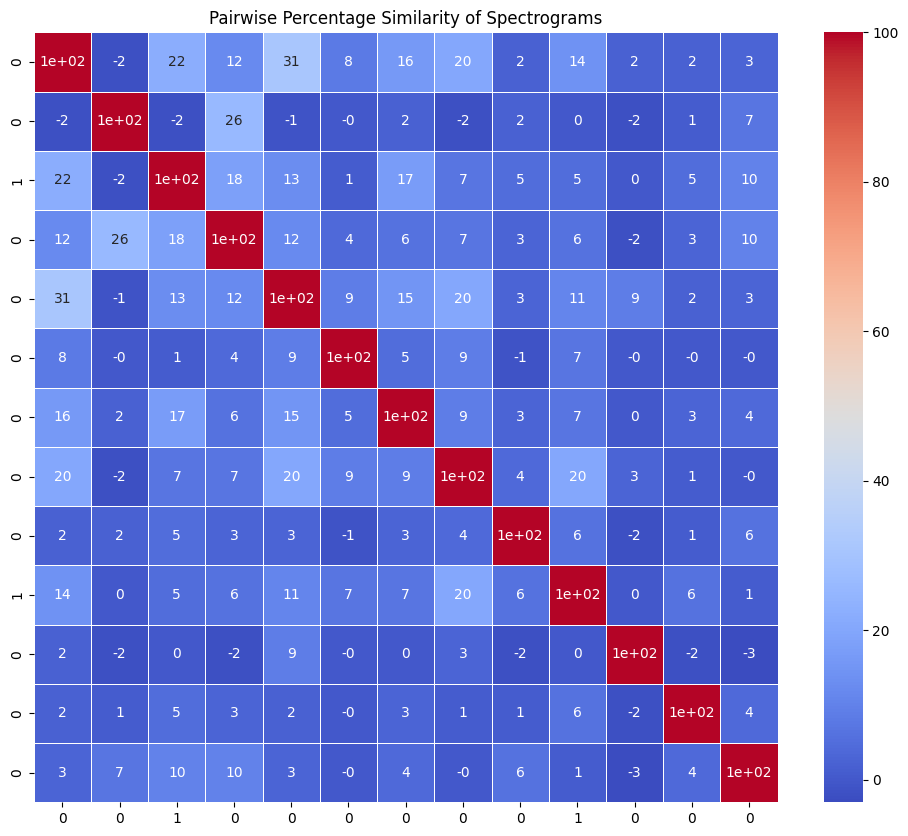

In [ ]:
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the pairwise Pearson correlation of the spectrograms
spectrograms = df_gf['Spectrogram'].tolist()

pearson_corr = np.zeros((len(spectrograms), len(spectrograms)))
for i in range(len(spectrograms)):
    for j in range(len(spectrograms)):
        corr, _ = pearsonr(spectrograms[i].flatten(), spectrograms[j].flatten())
        pearson_corr[i, j] = round(corr,2)

# Convert correlation to percentage similarity
percent_similarity = (pearson_corr )  * 100

# Increase cell width of heatmap
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the correlation matrix as a heatmap
sns.heatmap(percent_similarity, xticklabels=df_gf['Desert/Non-Desert'], yticklabels=df_gf['Desert/Non-Desert'], cmap='coolwarm', annot=True, linewidths=0.5, ax=ax)
plt.title('Pairwise Percentage Similarity of Spectrograms')
plt.show()


In [ ]:
desert_corr = []
non_desert_corr = []

for i in range(len(pearson_corr)):
    if df_gf.iloc[i]['Desert/Non-Desert'] == 1:
        desert_corr.append(pearson_corr[i,:])
    else:
        non_desert_corr.append(pearson_corr[i,:])

desert_corr_mean = np.mean(desert_corr)
non_desert_corr_mean = np.mean(non_desert_corr)

print(f"Average Pearson correlation for desert sounds: {desert_corr_mean}")
print(f"Average Pearson correlation for non-desert sounds: {non_desert_corr_mean}")


Average Pearson correlation for desert sounds: 0.1476923076923077
Average Pearson correlation for non-desert sounds: 0.12755244755244757


##zcross correlation  ##

In [ ]:
df_gf

id              en                                  file length  \
159  459199  Grey Francolin  //www.xeno-canto.org/459199/download   0:12   
160  441379  Grey Francolin  //www.xeno-canto.org/441379/download   0:07   
161  351857  Grey Francolin  //www.xeno-canto.org/351857/download   0:21   
162  337047  Grey Francolin  //www.xeno-canto.org/337047/download   0:51   
169  469359  Grey Francolin  //www.xeno-canto.org/469359/download   0:12   
170  459288  Grey Francolin  //www.xeno-canto.org/459288/download   0:10   
171  459287  Grey Francolin  //www.xeno-canto.org/459287/download   0:12   
173  406118  Grey Francolin  //www.xeno-canto.org/406118/download   0:05   
176  332453  Grey Francolin  //www.xeno-canto.org/332453/download   0:10   
178  308183  Grey Francolin  //www.xeno-canto.org/308183/download   0:25   
179  199108  Grey Francolin  //www.xeno-canto.org/199108/download   0:12   
180  194204  Grey Francolin  //www.xeno-canto.org/194204/download   0:12   
196   21668  Grey Francolin   //www.xeno-canto.org/21668/download   0:17   

     Desert/Non-Desert                                        Spectrogram  
159                  0  [[0.0196735, 0.011847297, 0.012750082, 0.01367...  
160                  0  [[0.13824023, 0.13824023, 0.13824023, 0.125113...  
161                  1  [[0.0027273414, 0.0025376135, 0.0024076584, 0....  
162                  0  [[1.1319139, 0.80904645, 0.30953705, 0.3465610...  
169                  0  [[0.010540615, 0.010540615, 0.010050956, 0.008...  
170                  0  [[0.031649914, 0.04223907, 0.046232, 0.0489929...  
171                  0  [[0.3798105, 0.5934378, 0.6115247, 0.5934378, ...  
173                  0  [[2.5131763e-05, 2.3128276e-05, 1.9531351e-05,...  
176                  0  [[0.0017128694, 0.0015215287, 0.0028998526, 0....  
178                  1  [[0.08750036, 0.10272636, 0.088757046, 0.09282...  
179                  0  [[0.0003162084, 0.0002948174, 0.00026208474, 0...  
180                  0  [[1.4116761e-11, 1.4116761e-11, 1.3488371e-11,...  
196                  0  [[1.670329, 1.7679543, 1.7679543, 4.985162, 5....

0.3381278


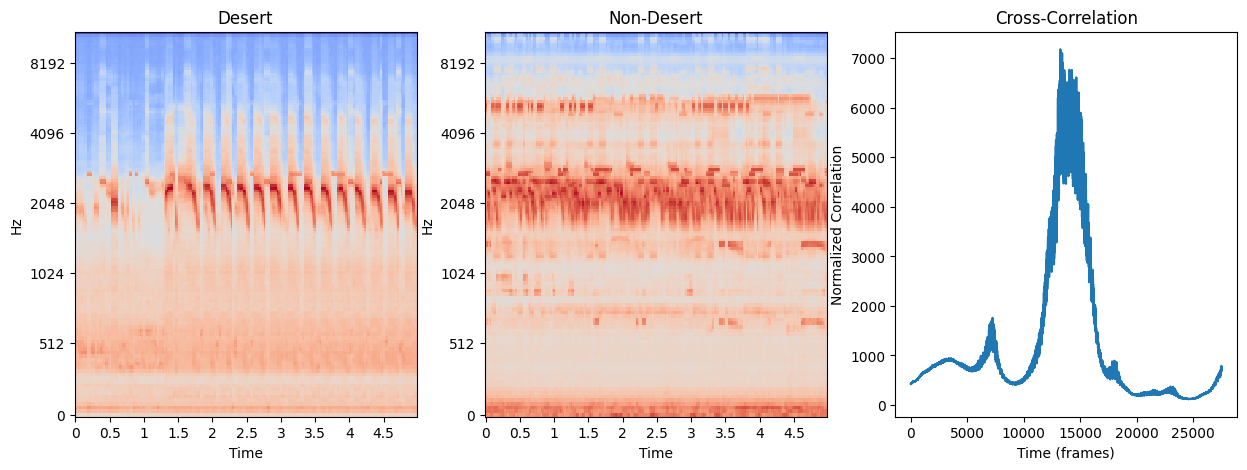

In [ ]:
import librosa.display as ld

# Initialize empty lists to store spectrograms for desert and non-desert sounds
desert_specs = []
non_desert_specs = []

# Compute the spectrograms for desert and non-desert sounds separately
for index,row in df_gf.iterrows():
    S=row['Spectrogram']
    if row['Desert/Non-Desert'] == 1:
        desert_specs.append(S)
    else:
        non_desert_specs.append(S)

# Compute the mean spectrograms for desert and non-desert sounds
mean_desert_spec = np.mean(desert_specs, axis=0)
mean_non_desert_spec = np.mean(non_desert_specs, axis=0)

# Compute the cross-correlation between the mean spectrograms
corr = np.correlate(mean_desert_spec.flatten(), mean_non_desert_spec.flatten(), mode='same')
# Compute the energy of each signal
energy_desert = np.sum(np.square(mean_desert_spec))
energy_non_desert = np.sum(np.square(mean_non_desert_spec))

# Compute the geometric mean of the energies
gm_energy = np.sqrt(energy_desert * energy_non_desert)

# Normalize the cross-correlation by the geometric mean of the energies
similarity = corr / gm_energy

peak_index = np.argmax(similarity)

# Extract the value of the correlation at zero time shift
corr_at_zero_shift = similarity[peak_index]
print(corr_at_zero_shift)

# Plot the mean spectrograms and the cross-correlation
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ld.specshow(librosa.power_to_db(mean_desert_spec, ref=np.max), x_axis='time', y_axis='mel', sr=sr, ax=ax[0], cmap='coolwarm')
ax[0].set(title='Desert')
ld.specshow(librosa.power_to_db(mean_non_desert_spec, ref=np.max), x_axis='time', y_axis='mel', sr=sr, ax=ax[1], cmap='coolwarm')
ax[1].set(title='Non-Desert')
ax[2].plot(corr)
ax[2].set(title='Cross-Correlation', xlabel='Time (frames)', ylabel='Normalized Correlation')
plt.show()


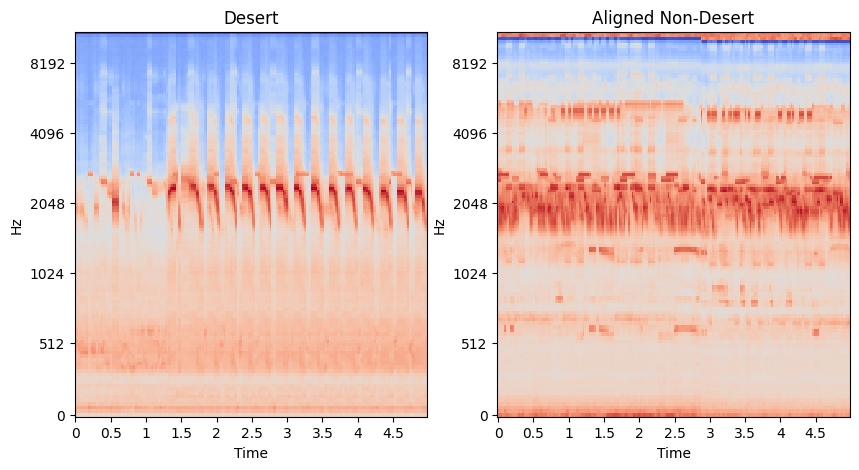

In [ ]:
# Find the time shift corresponding to the maximum cross-correlation
time_shift = np.argmax(corr) - len(corr)//2

# Shift the non-desert spectrogram by the time shift
aligned_non_desert_spec = np.roll(mean_non_desert_spec, time_shift)

# Plot the aligned mean spectrograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ld.specshow(librosa.power_to_db(mean_desert_spec, ref=np.max), x_axis='time', y_axis='mel', sr=sr, ax=ax[0], cmap='coolwarm')
ax[0].set(title='Desert')
ld.specshow(librosa.power_to_db(aligned_non_desert_spec, ref=np.max), x_axis='time', y_axis='mel', sr=sr, ax=ax[1], cmap='coolwarm')
ax[1].set(title='Aligned Non-Desert')
plt.show()


In [ ]:
'''
peak_index = np.argmax(corr)

# Convert the peak index to time in seconds
peak_time = (peak_index - len(corr)/2) / sr

# Print the peak time
print('Peak time:', peak_time)
'''

"\npeak_index = np.argmax(corr)\n\n# Convert the peak index to time in seconds\npeak_time = (peak_index - len(corr)/2) / sr\n\n# Print the peak time\nprint('Peak time:', peak_time)\n"

In [ ]:
'''
import librosa.display as ld

# Choose the time range around the peak to compare
t_start = int(peak_time - 0.1*sr)
t_end = int(peak_time + 0.1*sr)

# Extract the spectrograms around the time of the peak
desert_spec_peak = mean_desert_spec[:, t_start:t_end]
non_desert_spec_peak = mean_non_desert_spec[:, t_start:t_end]

# Plot the spectrograms
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ld.specshow(librosa.power_to_db(desert_spec_peak, ref=np.max), x_axis='time', y_axis='mel', sr=sr, ax=ax[0], cmap='coolwarm')
ax[0].set(title='Desert')
ld.specshow(librosa.power_to_db(non_desert_spec_peak, ref=np.max), x_axis='time', y_axis='mel', sr=sr, ax=ax[1], cmap='coolwarm')
ax[1].set(title='Non-Desert')

plt.show()
'''

"\nimport librosa.display as ld\n\n# Choose the time range around the peak to compare\nt_start = int(peak_time - 0.1*sr)\nt_end = int(peak_time + 0.1*sr)\n\n# Extract the spectrograms around the time of the peak\ndesert_spec_peak = mean_desert_spec[:, t_start:t_end]\nnon_desert_spec_peak = mean_non_desert_spec[:, t_start:t_end]\n\n# Plot the spectrograms\nfig, ax = plt.subplots(1, 2, figsize=(10, 5))\nld.specshow(librosa.power_to_db(desert_spec_peak, ref=np.max), x_axis='time', y_axis='mel', sr=sr, ax=ax[0], cmap='coolwarm')\nax[0].set(title='Desert')\nld.specshow(librosa.power_to_db(non_desert_spec_peak, ref=np.max), x_axis='time', y_axis='mel', sr=sr, ax=ax[1], cmap='coolwarm')\nax[1].set(title='Non-Desert')\n\nplt.show()\n"

##KL Divergence ##

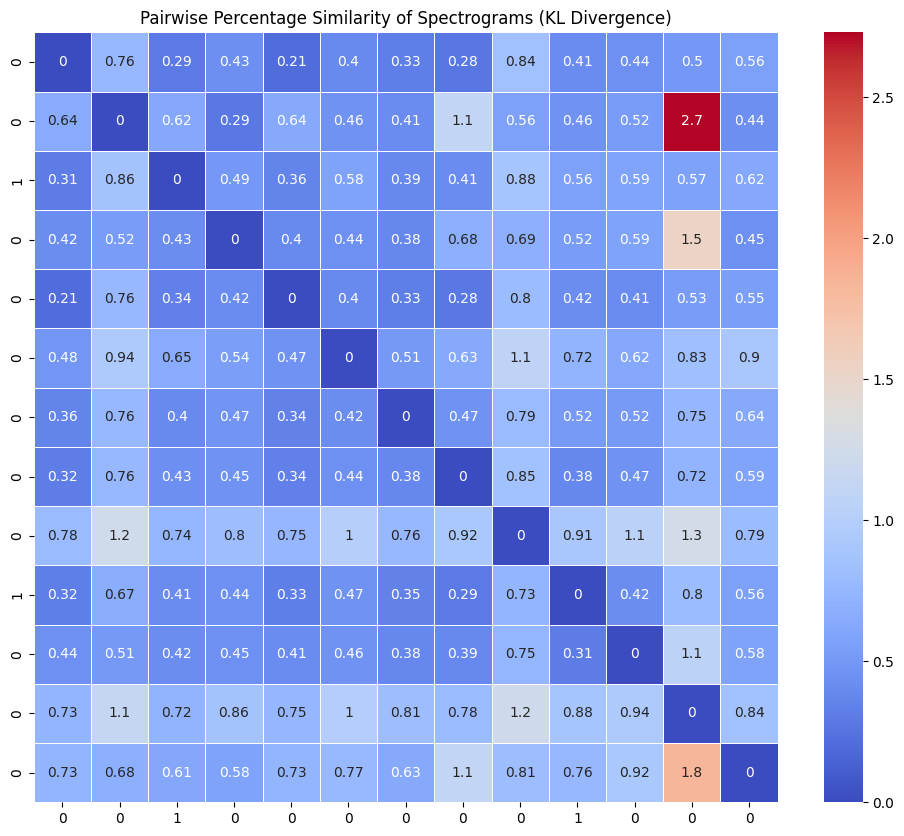

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define a function to compute the KL divergence between two spectrograms
def compute_kl_divergence(spec1, spec2):
    # Flatten the spectrograms into 1D arrays
    spec1_flat = spec1.flatten()
    spec2_flat = spec2.flatten()

    # Remove zero values to avoid divide-by-zero errors
    spec1_flat = spec1_flat[spec1_flat != 0]
    spec2_flat = spec2_flat[spec2_flat != 0]

    # Normalize the arrays to sum to 1
    spec1_flat = spec1_flat / np.sum(spec1_flat)
    spec2_flat = spec2_flat / np.sum(spec2_flat)

    # Compute the KL divergence
    kl_divergence = stats.entropy(spec1_flat, spec2_flat)

    # Normalize the KL divergence
    max_kl_divergence = stats.entropy(spec1_flat)
    normalized_kl_divergence = kl_divergence / max_kl_divergence

    return normalized_kl_divergence

# Create an empty matrix to store the KL divergences
kl_divergences = np.zeros((len(df_gf), len(df_gf)))

# Compute the KL divergence between each pair of spectrograms
for i, spec1 in enumerate(df_gf['Spectrogram']):
    for j, spec2 in enumerate(df_gf['Spectrogram']):
        kl_divergences[i, j] = compute_kl_divergence(spec1, spec2)

# Convert KL divergence to percentage similarity
#percent_similarity = (1 - kl_divergences) * 100

# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(kl_divergences, xticklabels=df_gf['Desert/Non-Desert'], yticklabels=df_gf['Desert/Non-Desert'], cmap='coolwarm', annot=True, linewidths=0.5, ax=ax)
plt.title('Pairwise Percentage Similarity of Spectrograms (KL Divergence)')
plt.show()


##Frequecny difference analysis ##

In [ ]:
'''
import numpy as np
import librosa
import matplotlib.pyplot as plt

# Filter the data based on 'Desert/Non-Desert' column
desert_spectrograms = df_gf[df_gf['Desert/Non-Desert'] == 1]['Spectrogram'].tolist()
non_desert_spectrograms = df_gf[df_gf['Desert/Non-Desert'] == 0]['Spectrogram'].tolist()

# Compute the mean mel-frequency of each spectrogram using mel scale for desert sounds
mean_desert_mels = []
for spec in desert_spectrograms:
    psd = librosa.power_to_db(spec, ref=np.max)
    mels = librosa.mel_frequencies(n_mels=128, fmin=0, fmax=22050)
    weights = np.sum(psd, axis=-1)
    weights /= np.sum(weights, axis=-1, keepdims=True)
    mean_mel = np.average(mels, weights=weights, axis=-1)
    mean_desert_mels.append(mean_mel)

# Compute the mean mel-frequency of each spectrogram using mel scale for non-desert sounds
mean_non_desert_mels = []
for spec in non_desert_spectrograms:
    psd = librosa.power_to_db(spec, ref=np.max)
    mels = librosa.mel_frequencies(n_mels=128, fmin=0, fmax=22050)
    weights = np.sum(psd, axis=-1)
    weights /= np.sum(weights, axis=-1, keepdims=True)
    mean_mel = np.average(mels, weights=weights, axis=-1)
    mean_non_desert_mels.append(mean_mel)

# Plot the mean mel-frequencies for desert sounds
plt.hist(mean_desert_mels, bins=50, alpha=0.5, label='Desert')
plt.hist(mean_non_desert_mels, bins=50, alpha=0.5, label='Non-Desert')
plt.xlabel('Mean Mel-Frequency')
plt.ylabel('Count')
plt.legend()
plt.show()

# Normalize by the number of sounds
num_desert_sounds = len(desert_spectrograms)
num_non_desert_sounds = len(non_desert_spectrograms)

plt.hist(mean_desert_mels, bins=50, alpha=0.5, label='Desert', density=True)
plt.hist(mean_non_desert_mels, bins=50, alpha=0.5, label='Non-Desert', density=True)
plt.xlabel('Mean Mel-Frequency')
plt.ylabel('Normalized Count')
plt.legend()
plt.show()
'''

"\nimport numpy as np\nimport librosa\nimport matplotlib.pyplot as plt\n\n# Filter the data based on 'Desert/Non-Desert' column\ndesert_spectrograms = df_gf[df_gf['Desert/Non-Desert'] == 1]['Spectrogram'].tolist()\nnon_desert_spectrograms = df_gf[df_gf['Desert/Non-Desert'] == 0]['Spectrogram'].tolist()\n\n# Compute the mean mel-frequency of each spectrogram using mel scale for desert sounds\nmean_desert_mels = []\nfor spec in desert_spectrograms:\n    psd = librosa.power_to_db(spec, ref=np.max)\n    mels = librosa.mel_frequencies(n_mels=128, fmin=0, fmax=22050)\n    weights = np.sum(psd, axis=-1)\n    weights /= np.sum(weights, axis=-1, keepdims=True)\n    mean_mel = np.average(mels, weights=weights, axis=-1)\n    mean_desert_mels.append(mean_mel)\n    \n# Compute the mean mel-frequency of each spectrogram using mel scale for non-desert sounds\nmean_non_desert_mels = []\nfor spec in non_desert_spectrograms:\n    psd = librosa.power_to_db(spec, ref=np.max)\n    mels = librosa.mel_freque

##Cosine Similarity ##

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
similarity = cosine_similarity(S2.reshape(1, -1), S2_des.reshape(1, -1))[0][0]


In [ ]:
similarity

0.11924703

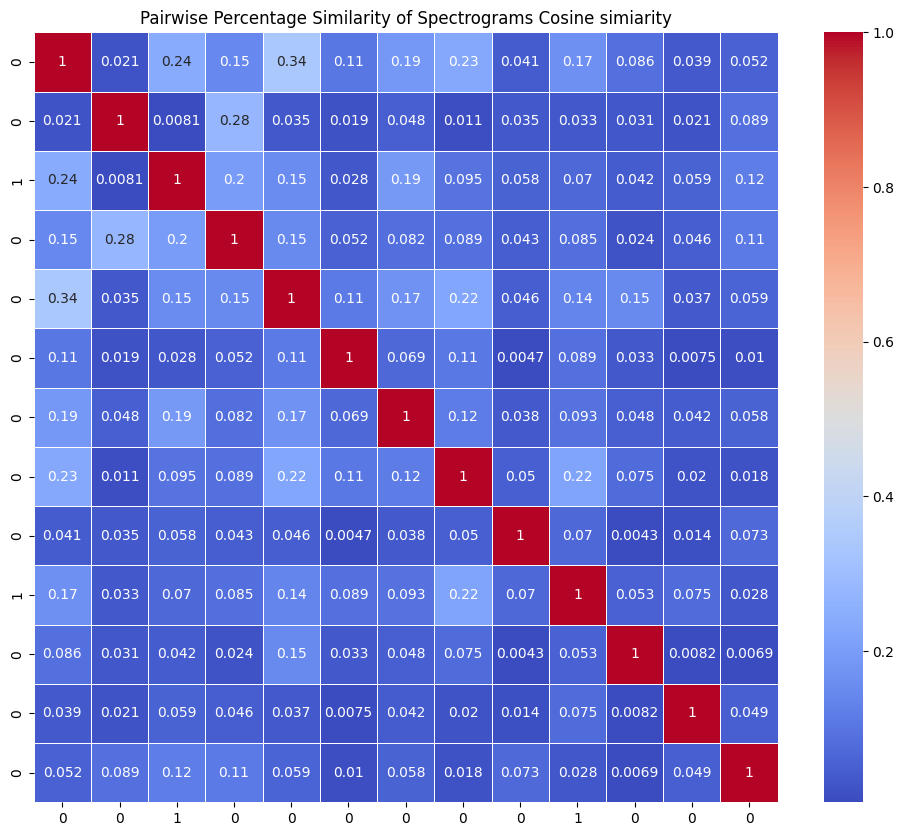

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the pairwise cosine similarity of the spectrograms
spectrograms = df_gf['Spectrogram'].tolist()
cosSim = np.zeros((len(df_gf), len(df_gf)))

for i, spec1 in enumerate(df_gf['Spectrogram']):
    for j, spec2 in enumerate(df_gf['Spectrogram']):
        cosSim[i,j]= cosine_similarity(spec1.reshape(1, -1), spec2.reshape(1, -1))[0][0]

# Convert KL divergence to percentage similarity
#percent_similarity = (1 - kl_divergences) * 100

# Plot the similarity matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(cosSim, xticklabels=df_gf['Desert/Non-Desert'], yticklabels=df_gf['Desert/Non-Desert'], cmap='coolwarm', annot=True, linewidths=0.5, ax=ax)
plt.title('Pairwise Percentage Similarity of Spectrograms Cosine simiarity')
plt.show()


##t-test##

In [ ]:
desert_spectrograms=[]
non_desert_spectrograms=[]

In [ ]:
for index,row in df_gf.iterrows():
  if row['Desert/Non-Desert']==1:
      desert_spectrograms.append(row['Spectrogram'])
  else:
    non_desert_spectrograms.append(row['Spectrogram'])

In [ ]:
np.abs(desert_spectrograms)**2

array([[[7.4383911e-06, 6.4394821e-06, 5.7968191e-06, ...,
         5.5016139e-06, 5.5653491e-06, 7.5313069e-06],
        [1.0660290e-05, 1.4015543e-05, 1.6362028e-05, ...,
         1.5211194e-05, 9.0264475e-06, 2.8066344e-05],
        [5.8219684e-05, 5.0206701e-05, 4.7723701e-05, ...,
         3.8311686e-05, 2.6035006e-05, 6.2312152e-05],
        ...,
        [1.2927381e-09, 1.2771608e-09, 3.2975742e-10, ...,
         1.4897013e-09, 3.3927736e-10, 1.1588128e-10],
        [1.8503397e-10, 1.6817056e-10, 5.9396224e-11, ...,
         1.4640208e-10, 6.8196560e-11, 2.0998247e-11],
        [6.1368895e-13, 6.1368895e-13, 3.2155593e-13, ...,
         6.5918012e-13, 5.2913078e-13, 2.3949224e-13]],

       [[7.6563135e-03, 1.0552705e-02, 7.8778127e-03, ...,
         1.0380173e-02, 9.0893414e-03, 2.2824656e-02],
        [1.3158490e-01, 1.8525115e-01, 1.0383347e-01, ...,
         2.1590270e-01, 2.5374246e-01, 2.4338046e-01],
        [5.1367456e-01, 5.9441161e-01, 5.6888288e-01, ...,
         7.404

In [ ]:
(np.abs(desert_spectrograms)**2).shape

(2, 128, 215)

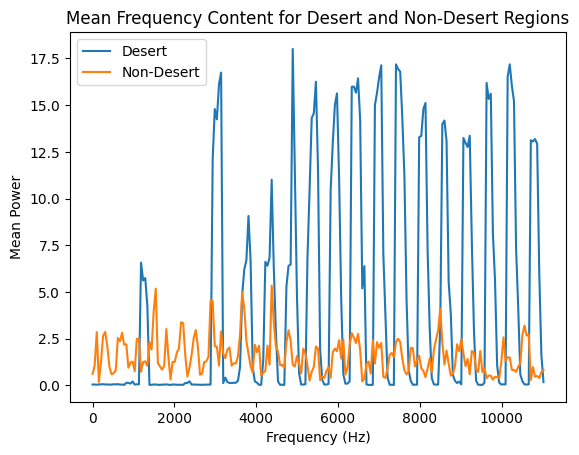

T-statistic: 6.537853557342265
P-value: 1.7054295656855082e-10


In [ ]:
from scipy.stats import ttest_ind


# Compute the average power in different frequency bands for each region (replace with your own frequency bands)
desert_freq = np.mean(np.abs(desert_spectrograms)**2,axis=1)
non_desert_freq = np.mean(np.abs(non_desert_spectrograms)**2, axis=1)

# Compute the frequency range of the spectrograms
freq_range = np.linspace(0, 22050/2,215)

# Plot the mean frequency content for each region
fig, ax = plt.subplots()
ax.plot(freq_range, np.mean(desert_freq, axis=0), label='Desert')
ax.plot(freq_range, np.mean(non_desert_freq, axis=0), label='Non-Desert')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Mean Power')
ax.set_title('Mean Frequency Content for Desert and Non-Desert Regions')
ax.legend()
plt.show()

# Perform a two-sample t-test to compare the mean frequency content between the two regions
t_stat, p_value = ttest_ind(desert_freq.flatten(), non_desert_freq.flatten(),equal_var=False)

print('T-statistic:', t_stat)
print('P-value:', p_value)


In [ ]:
df=df5

In [ ]:
df['Spectrogram'] = None

In [ ]:
df

id                     en                                  file  \
7      351852  Lesser Whistling Duck  //www.xeno-canto.org/351852/download   
10      95805  Lesser Whistling Duck   //www.xeno-canto.org/95805/download   
11      44829  Lesser Whistling Duck   //www.xeno-canto.org/44829/download   
13     234153  Lesser Whistling Duck  //www.xeno-canto.org/234153/download   
14     212199  Lesser Whistling Duck  //www.xeno-canto.org/212199/download   
...       ...                    ...                                   ...   
13269  403275         Little Bunting  //www.xeno-canto.org/403275/download   
13270  403273         Little Bunting  //www.xeno-canto.org/403273/download   
13271  403271         Little Bunting  //www.xeno-canto.org/403271/download   
13273   95783     Red-headed Bunting   //www.xeno-canto.org/95783/download   
13274  157720    Black-faced Bunting  //www.xeno-canto.org/157720/download   

      length  Desert/Non-Desert Spectrogram  
7       0:43                  0        None  
10      0:10                  0        None  
11      0:14                  0        None  
13      0:10                  0        None  
14      0:40                  0        None  
...      ...                ...         ...  
13269   1:02                  0        None  
13270   0:08                  0        None  
13271   0:24                  0        None  
13273   0:17                  0        None  
13274   1:11                  0        None  

[4506 rows x 6 columns]

2 11


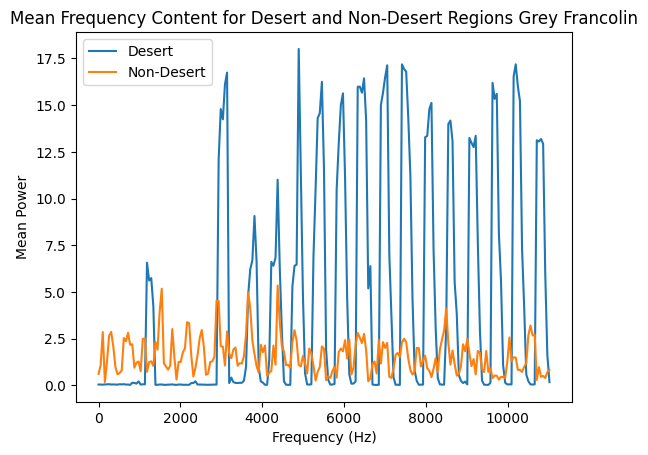

T-statistic: 6.537853557342265
P-value: 1.7054295656855082e-10
2 11


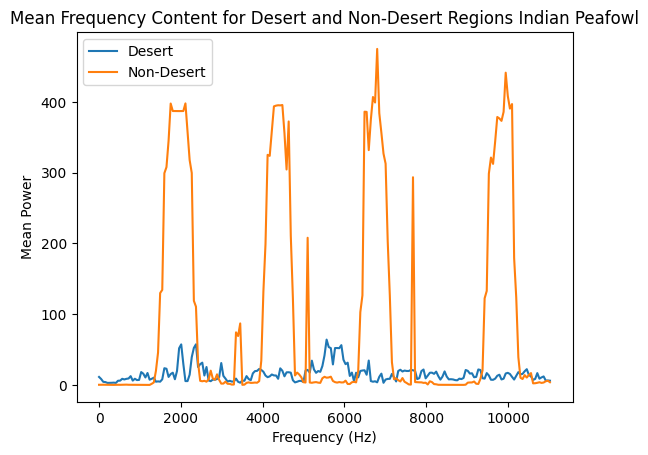

T-statistic: -7.17711893876356
P-value: 9.44369353178502e-13
1 23


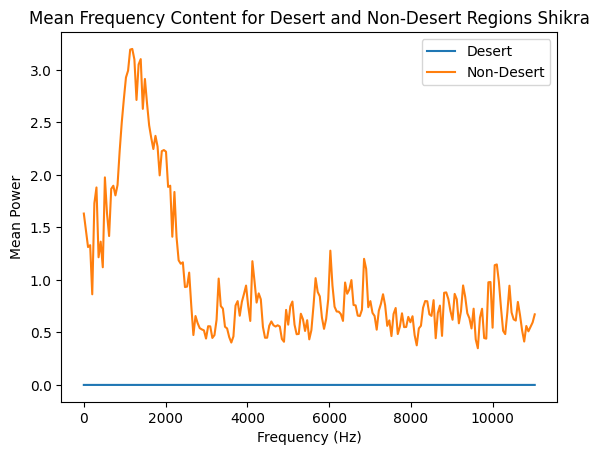

T-statistic: -21.490393500924487
P-value: 5.1627736515734075e-98
1 8


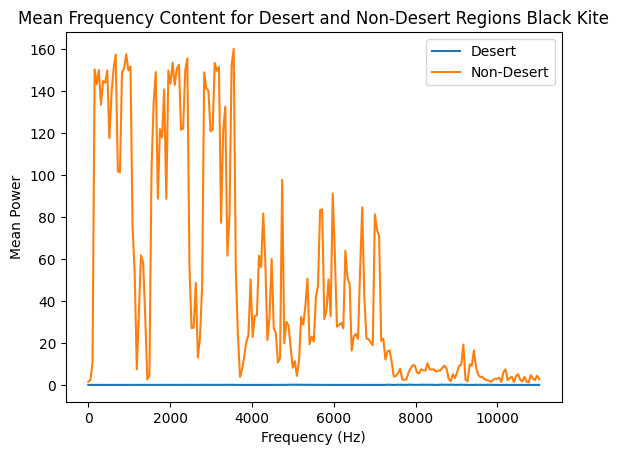

T-statistic: -10.559092885101864
P-value: 2.6924803373217986e-25
6 1


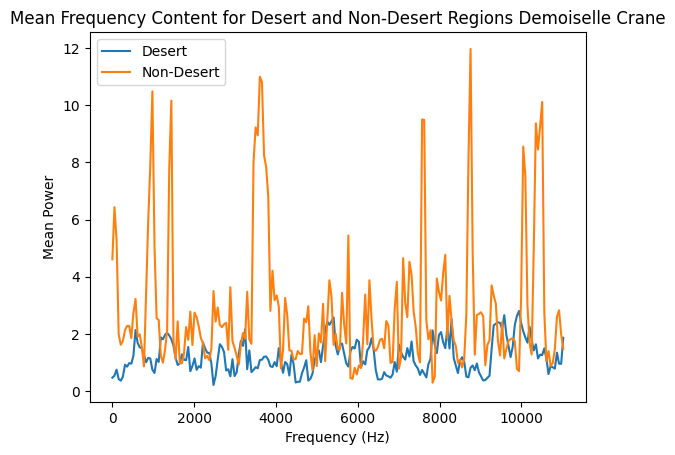

T-statistic: -9.681795262850143
P-value: 3.907148405616089e-19
1 6


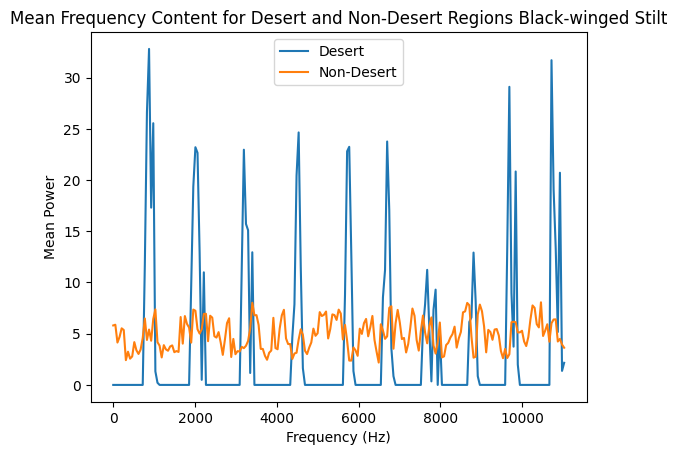

T-statistic: -2.4061676684694397
P-value: 0.016580617925616405
1 27


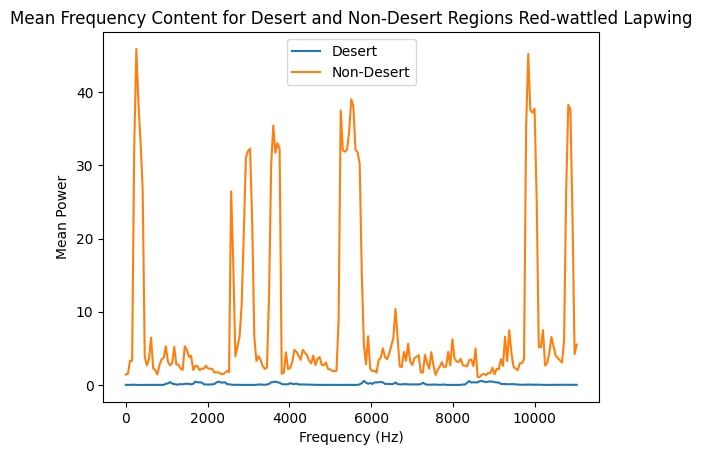

T-statistic: -9.574069541012669
P-value: 1.4817965839215838e-21
2 1


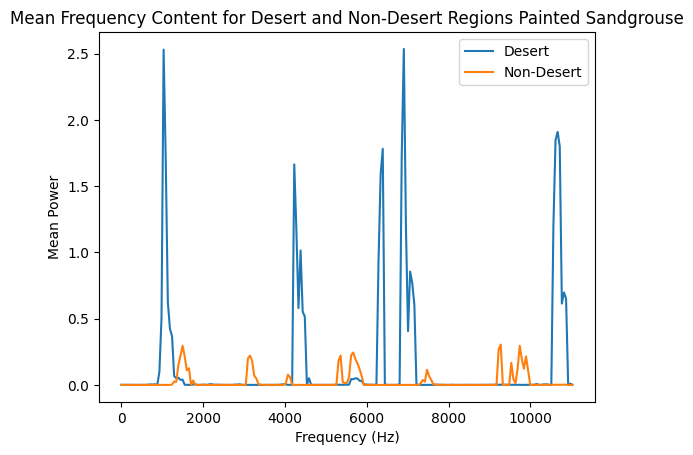

T-statistic: 4.079959831386053
P-value: 5.335769524711007e-05
1 3


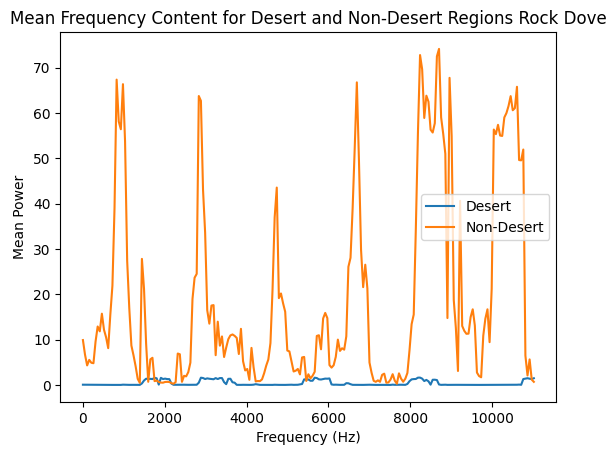

T-statistic: -11.916653894611473
P-value: 9.923751974588056e-30
1 21


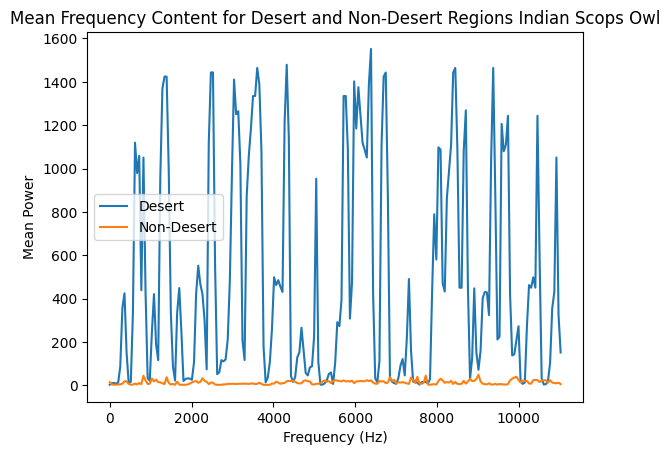

T-statistic: 14.326401826179556
P-value: 4.2475622958271666e-33
1 6


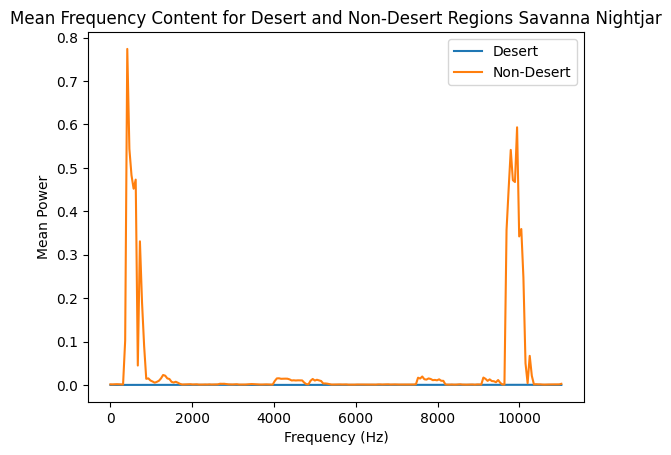

T-statistic: -4.5054921413703495
P-value: 7.2221452280069965e-06
1 1


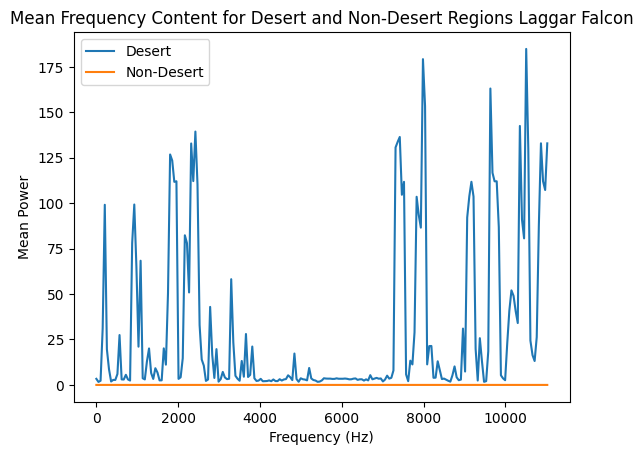

T-statistic: 9.953682722999297
P-value: 2.0026442940744263e-19


<ipython-input-57-efca958313cd>:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading audio file: 
1 4


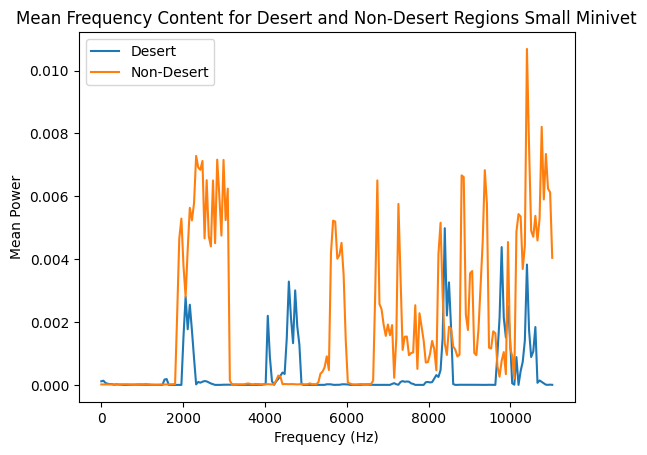

T-statistic: -7.85473130904534
P-value: 1.0463341568435903e-14
2 3


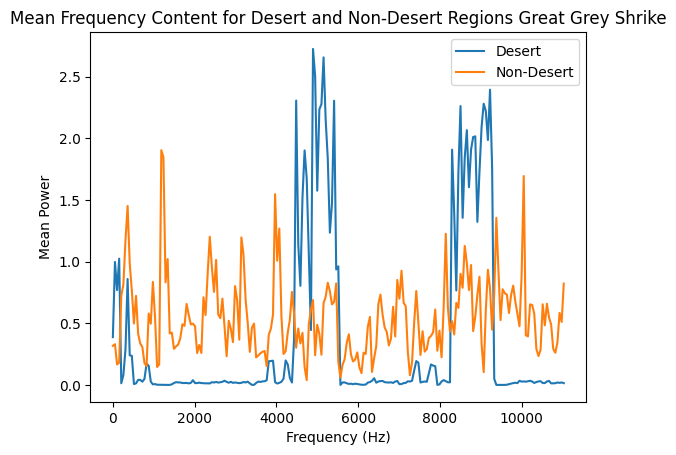

T-statistic: -2.781741209892763
P-value: 0.005555763514828283
1 59


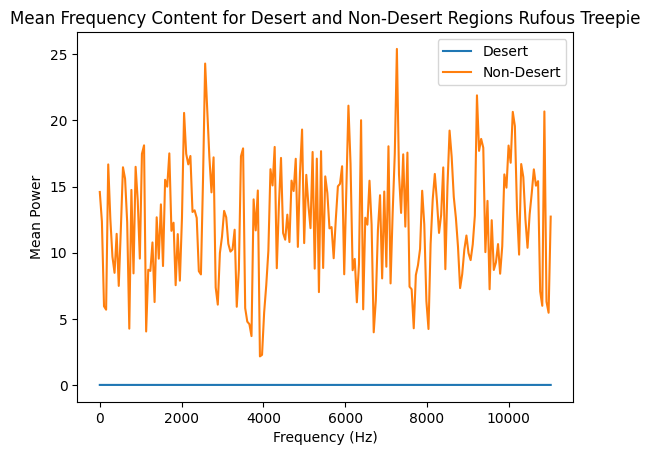

T-statistic: -17.793552365879894
P-value: 5.605433719898707e-70
3 39


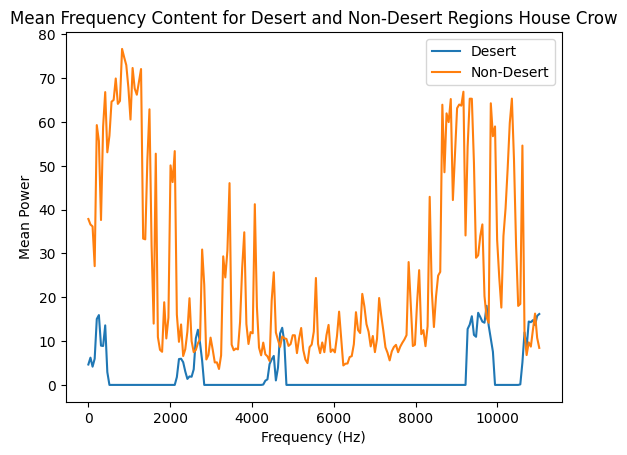

T-statistic: -12.2130887791579
P-value: 5.051525019827366e-34
1 18


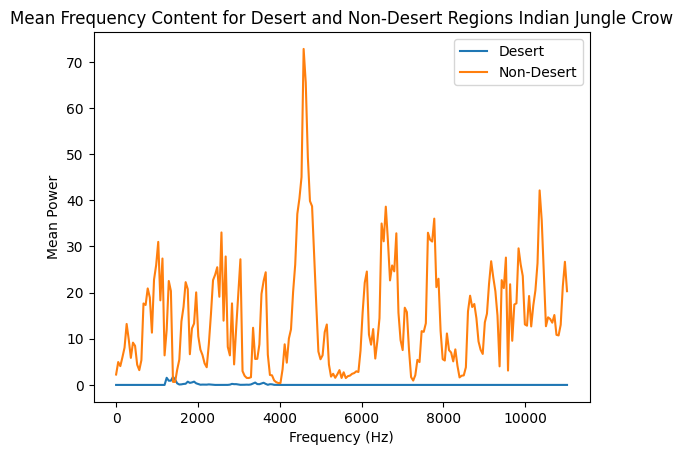

T-statistic: -17.955814597589068
P-value: 2.604565890512687e-69
4 2


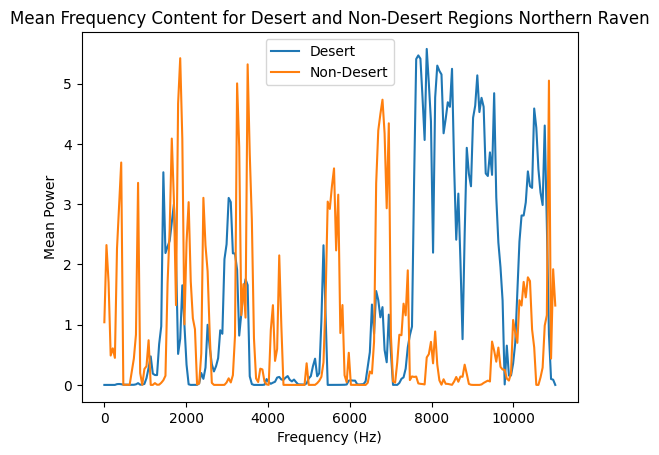

T-statistic: 2.9149762724553536
P-value: 0.0036190665166278236
1 4


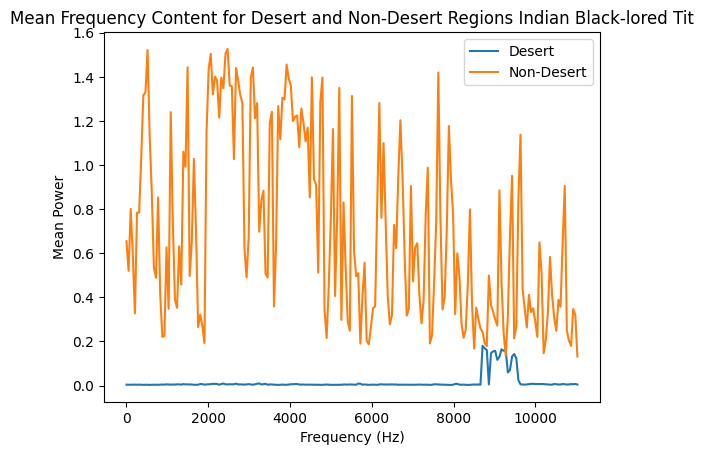

T-statistic: -14.027270893265063
P-value: 2.0259085222393373e-40
1 26


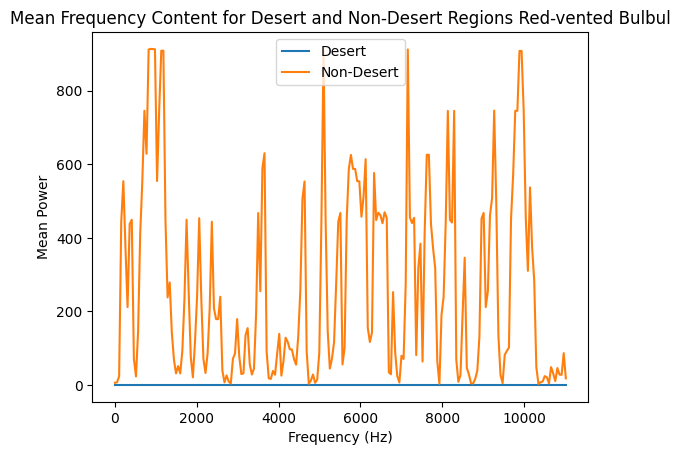

T-statistic: -10.759770158286308
P-value: 9.727945525233728e-27
2 2


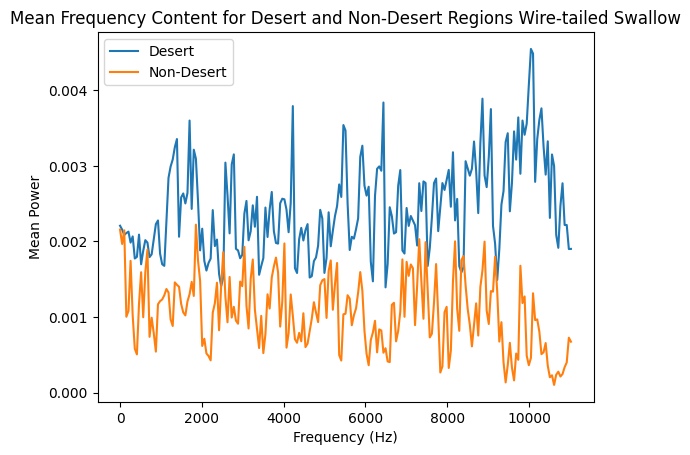

T-statistic: 22.72957699266947
P-value: 6.774651543978358e-90
3 27


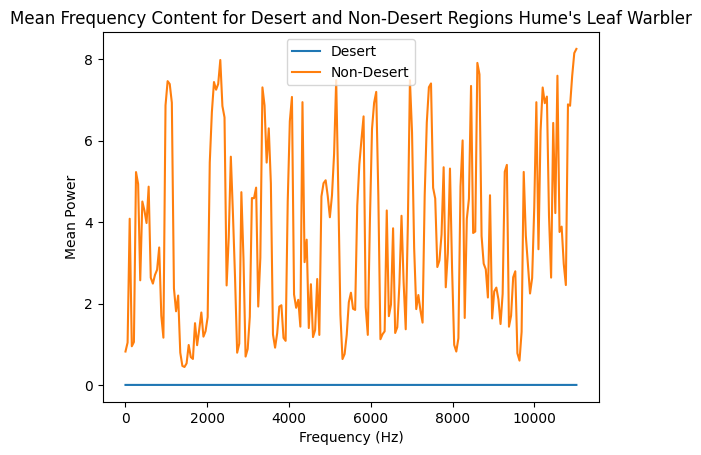

T-statistic: -14.266546888508206
P-value: 2.0575419198831935e-45
1 3


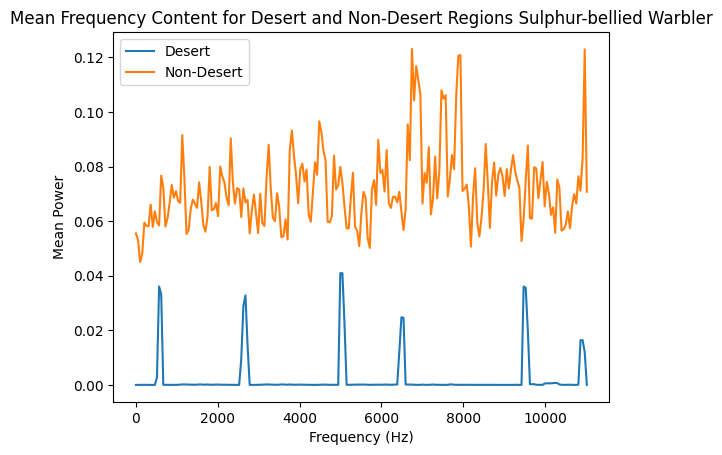

T-statistic: -16.778658483449025
P-value: 6.107227391856425e-53
1 29


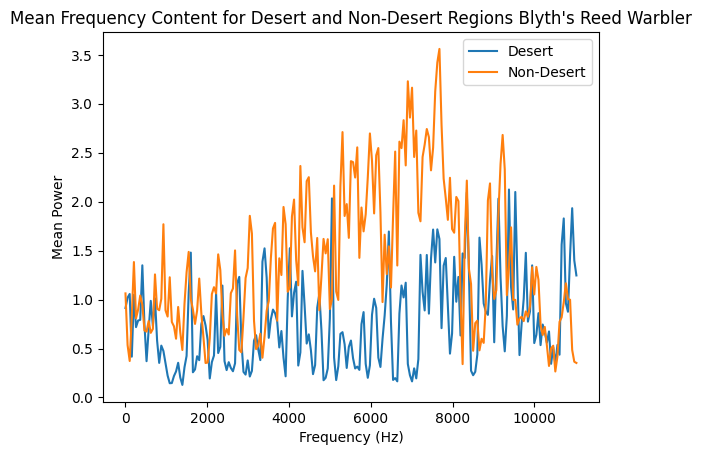

T-statistic: -8.059945640213028
P-value: 1.0056756310496995e-15
1 43


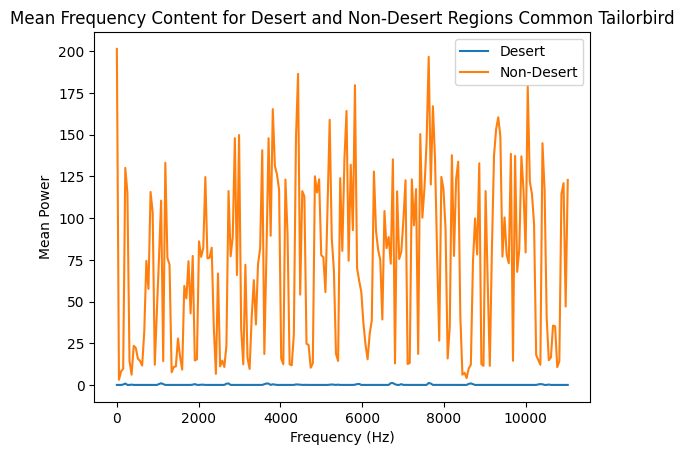

T-statistic: -12.268929033373658
P-value: 2.4582227525498044e-34
1 17


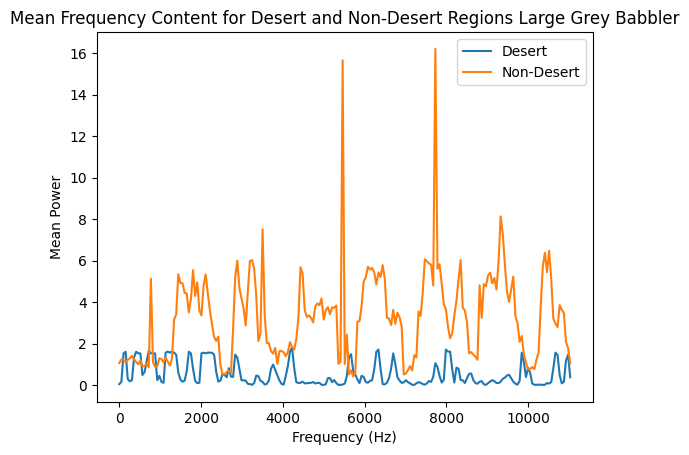

T-statistic: -14.194658710014949
P-value: 1.298710212885345e-44
2 18


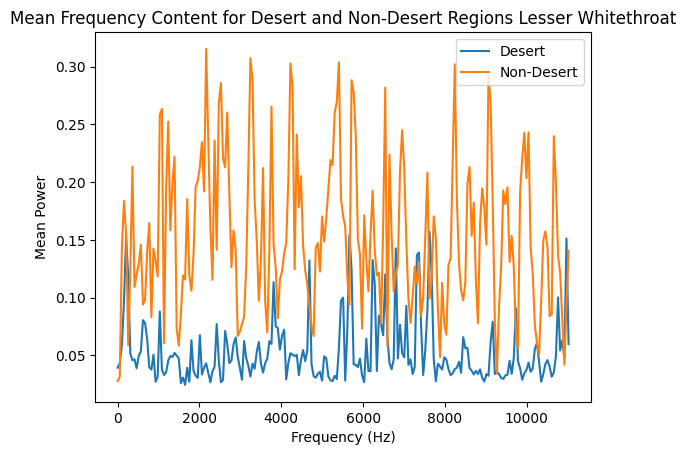

T-statistic: -9.21878407489572
P-value: 4.6002277072554905e-20
2 2


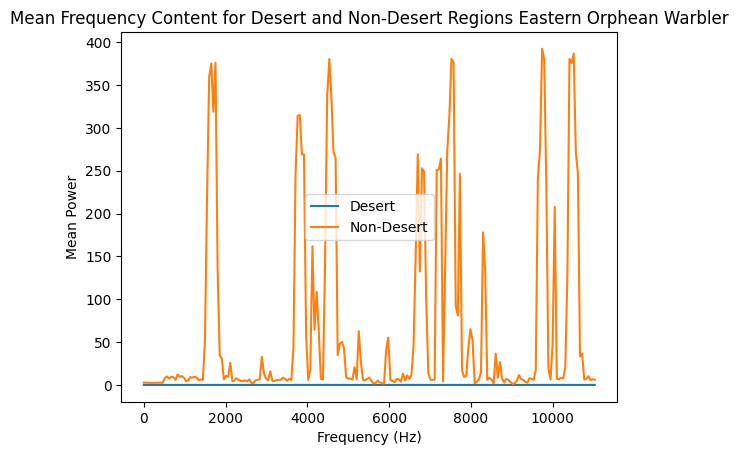

T-statistic: -8.267831453555004
P-value: 1.7259850771053555e-15


<ipython-input-57-efca958313cd>:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading audio file: 
1 6


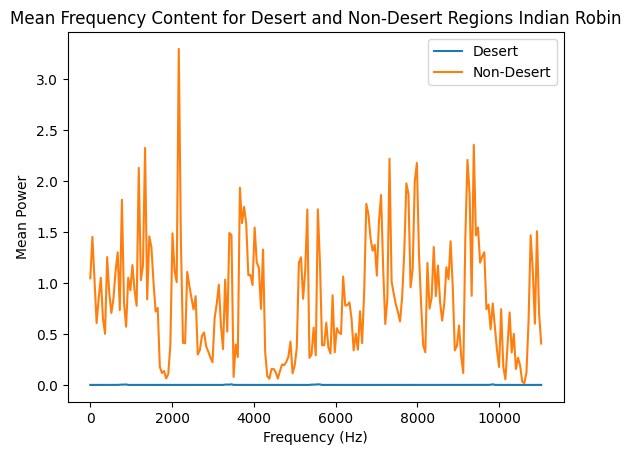

T-statistic: -15.866626204621006
P-value: 6.3538888300250016e-52


<ipython-input-57-efca958313cd>:21: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.9/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading audio file: 
2 2


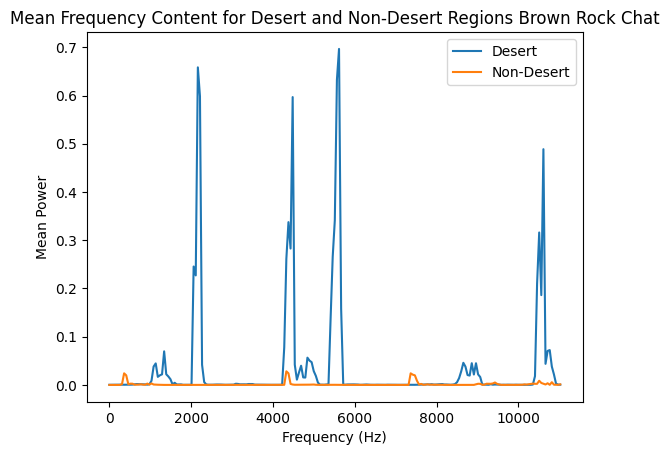

T-statistic: 4.528312437435364
P-value: 7.709214773448966e-06


In [ ]:
import os
import requests

for species in df['en'].unique():
    desert_spectrograms=[]
    non_desert_spectrograms=[]
    for index,row in df[df['en'] == species].iterrows():
        file_name = f"{index}.mp3"
        file_path = os.path.join(data_dir, file_name)

        # Check if audio file exists, and if not, download it
        if not os.path.isfile(file_path):
          audio_url = 'https:'+row['file']
          audio_data = requests.get(audio_url).content
          with open(file_path, 'wb') as handler:
              handler.write(audio_data)

        # Load audio file

        try:
            y, sr = librosa.load(file_path)
        except Exception as e:
            print(f"Error loading audio file: {e}")
            continue


        # Compute audio duration
        audio_duration = librosa.get_duration(y=y, sr=sr)

        # Exclude audio files less than 5 seconds long
        if audio_duration < 5:
          continue

        # Compute mel spectrogram and extract maximum energy
        S = librosa.feature.melspectrogram(y=y, sr=sr)
        S2=extract_max_energy(S,sr)

        # Store spectrogram in dataframe
        df.at[index, 'Spectrogram'] = S2

        # Add spectrogram to desert or non-desert list
        if row['Desert/Non-Desert']==1:
            desert_spectrograms.append(S2)
        else:
            non_desert_spectrograms.append(S2)

    # Check if the length of either desert or non-desert spectrograms is zero and continue to the next species if so
    if len(desert_spectrograms) == 0 or len(non_desert_spectrograms) == 0:
      continue
    print(len(desert_spectrograms),len(non_desert_spectrograms))
    # Compute the average power in different frequency bands for each region (replace with your own frequency bands)
    desert_freq = np.mean(np.abs(desert_spectrograms)**2,axis=1)
    non_desert_freq = np.mean(np.abs(non_desert_spectrograms)**2, axis=1)

    # Compute the frequency range of the spectrograms
    freq_range = np.linspace(0, 22050/2,215)

    # Plot the mean frequency content for each region
    fig, ax = plt.subplots()
    ax.plot(freq_range, np.mean(desert_freq, axis=0), label='Desert')
    ax.plot(freq_range, np.mean(non_desert_freq, axis=0), label='Non-Desert')
    ax.set_xlabel('Frequency (Hz)')
    ax.set_ylabel('Mean Power')
    ax.set_title(f'Mean Frequency Content for Desert and Non-Desert Regions {species}')
    ax.legend()
    plt.show()

    # Perform a two-sample t-test to compare the mean frequency content between the two regions
    t_stat, p_value = ttest_ind(desert_freq.flatten(), non_desert_freq.flatten(),equal_var=False)

    print('T-statistic:', t_stat)
    print('P-value:', p_value)


In [ ]:
desert_spectrograms

NameError: ignored

#Only doing energy frequency analysis #

In [ ]:
'''
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Compute the energy of each frequency bin for the two spectrograms
desert_energy = np.sum(mean_desert_spec, axis=1)
non_desert_energy = np.sum(mean_non_desert_spec, axis=1)

# Normalize the energy values
desert_energy_norm = desert_energy / np.sum(desert_energy)
non_desert_energy_norm = non_desert_energy / np.sum(non_desert_energy)
plt.figure(figsize=(12, 4))
hop_length = 512

ld.specshow(desert_energy_norm, x_axis='time', y_axis='log', sr=sr, hop_length=hop_length, cmap='coolwarm')
plt.title('Energy vs Frequency Plot for Audio Signal')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
ld.specshow(non_desert_energy_norm, x_axis='time', y_axis='log', sr=sr, hop_length=hop_length, cmap='coolwarm')
plt.title('Energy vs Frequency Plot for Audio Signal')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()
# Compute the cosine similarity between the normalized energy vectors
similarity = cosine_similarity(desert_energy_norm.reshape(1, -1), non_desert_energy_norm.reshape(1, -1))[0][0]

# Assign a similarity score based on the cosine similarity value
similarity_score = (similarity + 1) / 2 # Scale the cosine similarity to a range of 0 to 1

print('Similarity score:', similarity_score)
'''